In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = {
    'mesin':[1000,2000,3000,4000,5000],
    'harga':[10,25,34,55,80]
}

In [3]:
df = pd.DataFrame(data)
df

mesin  harga
0   1000     10
1   2000     25
2   3000     34
3   4000     55
4   5000     80

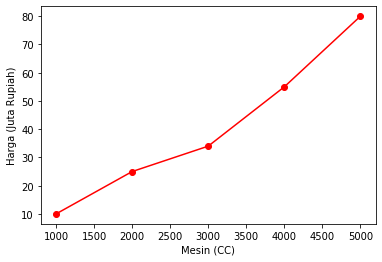

In [4]:
plt.plot(df['mesin'], df['harga'], 'ro-')
plt.xlabel('Mesin (CC)')
plt.ylabel('Harga (Juta Rupiah)')
plt.show()

In [5]:
df.corr()

mesin     harga
mesin  1.000000  0.984321
harga  0.984321  1.000000

In [6]:
df.corr()[['harga']].sort_values('harga', ascending=False)

harga
harga  1.000000
mesin  0.984321

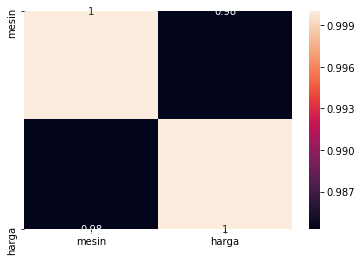

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
model = LinearRegression()
model.fit(df[['mesin']], df['harga'])
df['prediction'] = model.predict(df[['mesin']])
df

mesin  harga  prediction
0   1000     10         6.8
1   2000     25        23.8
2   3000     34        40.8
3   4000     55        57.8
4   5000     80        74.8

In [9]:
print(model.coef_)
print(model.intercept_)

[0.017]
-10.20000000000001


y = ax + b

In [10]:
y = model.coef_[0]*1000 + (model.intercept_)
round(y,2)

6.8

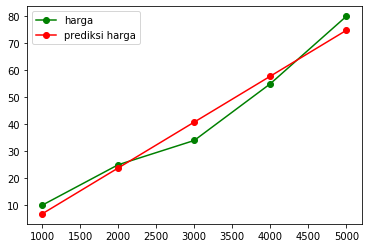

In [11]:
plt.plot(df['mesin'], df['harga'], 'go-', label='harga')
plt.plot(df['mesin'], df['prediction'], 'ro-', label='prediksi harga') #best fit line
plt.legend()
plt.show()

In [12]:
data_ads = {
    'year':[1,2,3,4,5,6,7,8,9],
    'sales':[651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518], #juta rupiah
    'ads':[23, 26, 30, 34, 43, 48, 52, 57, 58] # juta rupiah
}
df2 = pd.DataFrame(data_ads)
df2

year  sales  ads
0     1    651   23
1     2    762   26
2     3    856   30
3     4   1063   34
4     5   1190   43
5     6   1298   48
6     7   1421   52
7     8   1440   57
8     9   1518   58

In [13]:
model2 = LinearRegression()
model2.fit(df2[['year', 'ads']], df2['sales'])
df2['sales_prediction'] = model2.predict(df2[['year', 'ads']])
df2

year  sales  ads  sales_prediction
0     1    651   23        691.898876
1     2    762   26        780.468094
2     3    856   30        883.026924
3     4   1063   34        985.585754
4     5   1190   43       1158.092644
5     6   1298   48       1274.641085
6     7   1421   52       1377.199915
7     8   1440   57       1493.748357
8     9   1518   58       1554.338351

In [14]:
print('coef year: ', model2.coef_[0])
print('coef ads: ', model2.coef_[1])
print('intercept: ', model2.intercept_)

coef year:  46.60038159847367
coef ads:  13.989612041551833
intercept:  323.5374178503282


In [15]:
y = model2.coef_[0]*2 + model2.coef_[1]*26 + model2.intercept_
y

780.4680941276232

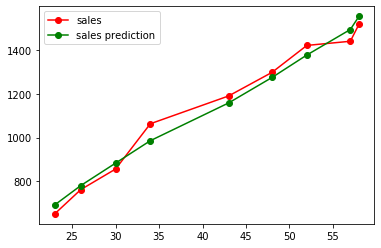

In [16]:
plt.plot(df2['ads'], df2['sales'], 'ro-', label='sales')
plt.plot(df2['ads'], df2['sales_prediction'], 'go-', label='sales prediction')
plt.legend()
plt.show()

In [17]:
df2.corr().sort_values('sales', ascending=False)['sales']

sales               1.000000
sales_prediction    0.989775
ads                 0.988288
year                0.986561
Name: sales, dtype: float64

In [18]:
bps = pd.read_excel('indo_12_1.xls', skiprows=3, skipfooter=2, na_values='-')
bps.rename(columns={'Unnamed: 0':'Provinsi'}, inplace=True)
bps.set_index('Provinsi', inplace=True)
bps

1971         1980         1990         1995  \
Provinsi                                                                        
Aceh                         2008595.0    2611271.0    3416156.0    3847583.0   
Sumatera Utara               6621831.0    8360894.0   10256027.0   11114667.0   
Sumatera Barat               2793196.0    3406816.0    4000207.0    4323170.0   
Riau                         1641545.0    2168535.0    3303976.0    3900534.0   
Jambi                        1006084.0    1445994.0    2020568.0    2369959.0   
Sumatera Selatan             3440573.0    4629801.0    6313074.0    7207545.0   
Bengkulu                      519316.0     768064.0    1179122.0    1409117.0   
Lampung                      2777008.0    4624785.0    6017573.0    6657759.0   
Kepulauan Bangka Belitung          NaN          NaN          NaN          NaN   
Kepulauan Riau                     NaN          NaN          NaN          NaN   
DKI Jakarta                  4579303.0    6503449.0    8259266.0    9112652.0   
Jawa Barat                  21623529.0   27453525.0   35384352.0   39206787.0   
Jawa Tengah                 21877136.0   25372889.0   28520643.0   29653266.0   
DI Yogyakarta                2489360.0    2750813.0    2913054.0    2916779.0   
Jawa Timur                  25516999.0   29188852.0   32503991.0   33844002.0   
Banten                             NaN          NaN          NaN          NaN   
Bali                         2120322.0    2469930.0    2777811.0    2895649.0   
Nusa Tenggara Barat          2203465.0    2724664.0    3369649.0    3645713.0   
Nusa Tenggara Timur          2295287.0    2737166.0    3268644.0    3577472.0   
Kalimantan Barat             2019936.0    2486068.0    3229153.0    3635730.0   
Kalimantan Tengah             701936.0     954353.0    1396486.0    1627453.0   
Kalimantan Selatan           1699105.0    2064649.0    2597572.0    2893477.0   
Kalimantan Timur              733797.0    1218016.0    1876663.0    2314183.0   
Sulawesi Utara               1718543.0    2115384.0    2478119.0    2649093.0   
Sulawesi Tengah               913662.0    1289635.0    1711327.0    1938071.0   
Sulawesi Selatan             5180576.0    6062212.0    6981646.0    7558368.0   
Sulawesi Tenggara             714120.0     942302.0    1349619.0    1586917.0   
Gorontalo                          NaN          NaN          NaN          NaN   
Sulawesi Barat                     NaN          NaN          NaN          NaN   
Maluku                       1089565.0    1411006.0    1857790.0    2086516.0   
Maluku Utara                       NaN          NaN          NaN          NaN   
Papua Barat                        NaN          NaN          NaN          NaN   
Papua                         923440.0    1173875.0    1648708.0    1942627.0   
INDONESIA                  119208229.0  147490298.0  179378946.0  194754808.0   

                                  2000       2010  
Provinsi                                           
Aceh                         3930905.0    4494410  
Sumatera Utara              11649655.0   12982204  
Sumatera Barat               4248931.0    4846909  
Riau                         4957627.0    5538367  
Jambi                        2413846.0    3092265  
Sumatera Selatan             6899675.0    7450394  
Bengkulu                     1567432.0    1715518  
Lampung                      6741439.0    7608405  
Kepulauan Bangka Belitung     900197.0    1223296  
Kepulauan Riau                     NaN    1679163  
DKI Jakarta                  8389443.0    9607787  
Jawa Barat                  35729537.0   43053732  
Jawa Tengah                 31228940.0   32382657  
DI Yogyakarta                3122268.0    3457491  
Jawa Timur                  34783640.0   37476757  
Banten                       8098780.0   10632166  
Bali                         3151162.0    3890757  
Nusa Tenggara Barat          4009261.0    4500212  
Nusa Tenggara Timur          3952279.0    4683827  
Kalimantan Barat         

## 1. Carilah Populasi Provinsi terendah 1971
## 2. Carilah Populasi Provinsi tertinggi 2010
## 3. Carilah Populasi Indonesia dari tahun 1971 - 2010
## 4. Concat 3 dataframe tadi menjadi 1
## 5. Prediksi populasi pada tahun 2050

In [19]:
# provinsi dengan populasi terendah di tahun 1971
lowest = bps[bps[1971] == bps[1971].min()]
lowest

1971      1980       1990       1995       2000     2010
Provinsi                                                              
Bengkulu  519316.0  768064.0  1179122.0  1409117.0  1567432.0  1715518

In [20]:
highest = bps[bps.index != "INDONESIA"]
highest = highest[highest[2010] == highest[2010].max()]
highest

1971        1980        1990        1995        2000  \
Provinsi                                                                 
Jawa Barat  21623529.0  27453525.0  35384352.0  39206787.0  35729537.0   

                2010  
Provinsi              
Jawa Barat  43053732

In [21]:
indo = bps[bps.index == "INDONESIA"]
indo

1971         1980         1990         1995         2000  \
Provinsi                                                                     
INDONESIA  119208229.0  147490298.0  179378946.0  194754808.0  206264595.0   

                2010  
Provinsi              
INDONESIA  237641326

In [22]:
hilo = pd.concat([highest, lowest, indo])
hilo

1971         1980         1990         1995         2000  \
Provinsi                                                                      
Jawa Barat   21623529.0   27453525.0   35384352.0   39206787.0   35729537.0   
Bengkulu       519316.0     768064.0    1179122.0    1409117.0    1567432.0   
INDONESIA   119208229.0  147490298.0  179378946.0  194754808.0  206264595.0   

                 2010  
Provinsi               
Jawa Barat   43053732  
Bengkulu      1715518  
INDONESIA   237641326

In [23]:
hilo = hilo.T
hilo

Provinsi  Jawa Barat   Bengkulu    INDONESIA
1971      21623529.0   519316.0  119208229.0
1980      27453525.0   768064.0  147490298.0
1990      35384352.0  1179122.0  179378946.0
1995      39206787.0  1409117.0  194754808.0
2000      35729537.0  1567432.0  206264595.0
2010      43053732.0  1715518.0  237641326.0

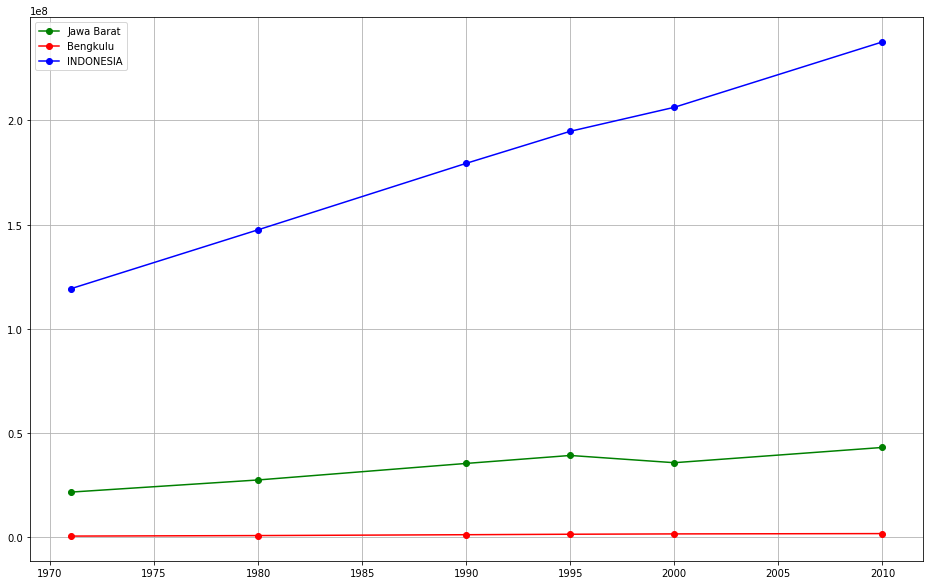

In [24]:
plt.figure(figsize=(16,10))
plt.plot(hilo.index, hilo.iloc[:,0], 'go-', label = hilo.columns.tolist()[0])
plt.plot(hilo.index, hilo.iloc[:,1], 'ro-', label = hilo.columns.tolist()[1])
plt.plot(hilo.index, hilo.iloc[:,2], 'bo-', label = hilo.columns.tolist()[2])
plt.legend()
plt.grid()
plt.show()

In [25]:
hilo.reset_index(inplace=True)

In [26]:
hilo

Provinsi  index  Jawa Barat   Bengkulu    INDONESIA
0          1971  21623529.0   519316.0  119208229.0
1          1980  27453525.0   768064.0  147490298.0
2          1990  35384352.0  1179122.0  179378946.0
3          1995  39206787.0  1409117.0  194754808.0
4          2000  35729537.0  1567432.0  206264595.0
5          2010  43053732.0  1715518.0  237641326.0

In [27]:
hilo.rename(columns={'index':'year'}, inplace=True)

In [28]:
hilo

Provinsi  year  Jawa Barat   Bengkulu    INDONESIA
0         1971  21623529.0   519316.0  119208229.0
1         1980  27453525.0   768064.0  147490298.0
2         1990  35384352.0  1179122.0  179378946.0
3         1995  39206787.0  1409117.0  194754808.0
4         2000  35729537.0  1567432.0  206264595.0
5         2010  43053732.0  1715518.0  237641326.0

In [29]:
model3 = LinearRegression()
pred_2050 = []
for i in list(range(1,4)):
    model.fit(hilo[['year']], hilo.iloc[:,i])
    hilo[f'prediction_{hilo.columns.tolist()[i]}'] = model.predict(hilo[['year']])
    pred_2050.append(int(model.predict([[2050]])))

In [30]:
pred_2050

[65443584, 3139134, 359273669]

In [31]:
hilo

Provinsi  year  Jawa Barat   Bengkulu    INDONESIA  prediction_Jawa Barat  \
0         1971  21623529.0   519316.0  119208229.0           2.299558e+07   
1         1980  27453525.0   768064.0  147490298.0           2.783143e+07   
2         1990  35384352.0  1179122.0  179378946.0           3.320459e+07   
3         1995  39206787.0  1409117.0  194754808.0           3.589118e+07   
4         2000  35729537.0  1567432.0  206264595.0           3.857776e+07   
5         2010  43053732.0  1715518.0  237641326.0           4.395092e+07   

Provinsi  prediction_Bengkulu  prediction_INDONESIA  
0                5.334203e+05          1.202867e+08  
1                8.302738e+05          1.475130e+08  
2                1.160111e+06          1.777645e+08  
3                1.325030e+06          1.928903e+08  
4                1.489948e+06          2.080161e+08  
5                1.819786e+06          2.382676e+08

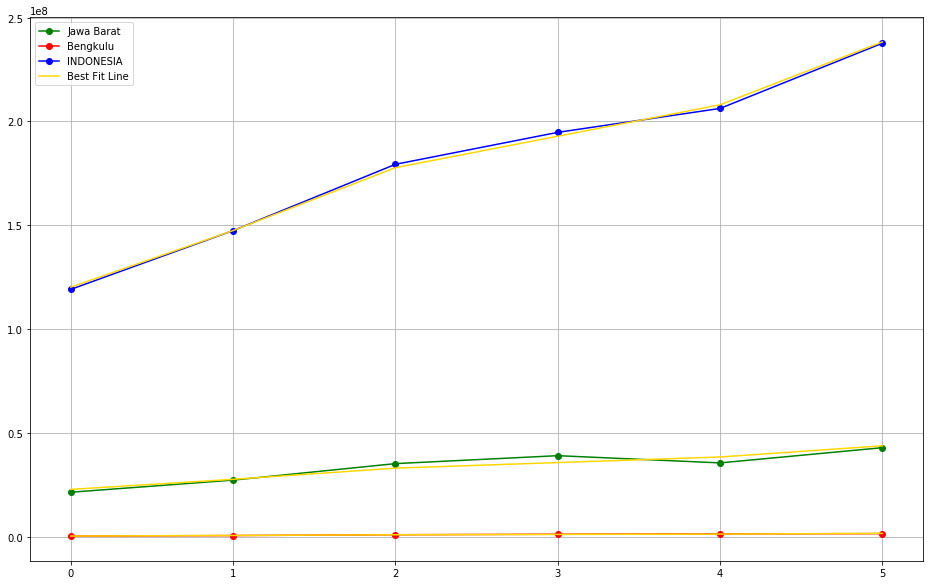

In [32]:
plt.figure(figsize=(16,10))
plt.plot(hilo.index, hilo.iloc[:,1], 'go-')
plt.plot(hilo.index, hilo.iloc[:,2], 'ro-')
plt.plot(hilo.index, hilo.iloc[:,3], 'bo-')
plt.plot(hilo.index, hilo.iloc[:,4], 'gold')
plt.plot(hilo.index, hilo.iloc[:,5], 'gold')
plt.plot(hilo.index, hilo.iloc[:,6], 'gold')
plt.legend([hilo.columns.tolist()[1], hilo.columns.tolist()[2], hilo.columns.tolist()[3], 'Best Fit Line'])
plt.grid()
plt.show()

In [33]:
print(f'Prediksi populasi Jawa Barat tahun 2050 {int(pred_2050[0]):,}')
print(f'Prediksi populasi Bengkulu tahun 2050 {int(pred_2050[1]):,}')
print(f'Prediksi populasi Indonesia tahun 2050 {int(pred_2050[2]):,}')

Prediksi populasi Jawa Barat tahun 2050 65,443,584
Prediksi populasi Bengkulu tahun 2050 3,139,134
Prediksi populasi Indonesia tahun 2050 359,273,669


In [34]:
model.coef_[0]

3025152.0173469386

In [35]:
model.intercept_

-5842287966.204422

In [36]:
df

mesin  harga  prediction
0   1000     10         6.8
1   2000     25        23.8
2   3000     34        40.8
3   4000     55        57.8
4   5000     80        74.8

In [37]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error, mean_absolute_error as mae, median_absolute_error as medae, mean_squared_log_error as msle
from sklearn.metrics import r2_score

In [38]:
max_err = max_error(df['harga'], df['prediction'])
mae_err = mae(df['harga'], df['prediction'])
mse_err = mse(df['harga'], df['prediction'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['prediction'])
msle_error = msle(df['harga'], df['prediction'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['prediction'])

In [39]:
print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 6.799999999999997
Mean Absolute Error 3.8400000000000047
Mean Squared Error 18.560000000000034
Root Mean Squared Error 4.308131845707607
Median Absolute Error 3.20000000000001
Mean Squared Logaritmic Error 0.03174360285405546
Root Mean Squared Logaritmic Error 0.17816734508336668
R2_Score 0.9688882928791739


# Multivariate Linear Regression

In [40]:
df.drop('prediction', axis=1,inplace=True)

In [41]:
df['usia'] = [12, 10, 9, 5, 4]
df['odo'] = [235000, 200000, 150000, 100000, 90000]
df['penumpang'] = [4, 6, 4, 6, 6]
df['merk'] = ['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW']

In [42]:
df = df['mesin usia odo penumpang merk harga'.split()]
df

mesin  usia     odo  penumpang        merk  harga
0   1000    12  235000          4    Daihatsu     10
1   2000    10  200000          6  Mitsubishi     25
2   3000     9  150000          4       Honda     34
3   4000     5  100000          6      Toyota     55
4   5000     4   90000          6         BMW     80

In [43]:
df.corr()['harga'].sort_values(ascending=False)

harga        1.000000
mesin        0.984321
penumpang    0.628471
odo         -0.945458
usia        -0.974577
Name: harga, dtype: float64

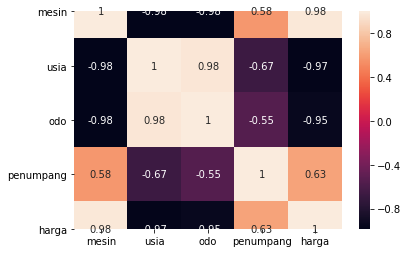

In [44]:
sns.heatmap(df.corr(), annot=True)

In [45]:
model1 = LinearRegression()
model1.fit(df[['mesin']], df['harga'])
df['pred_mes'] = model1.predict(df[['mesin']])
df

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mesin  usia     odo  penumpang        merk  harga  pred_mes
0   1000    12  235000          4    Daihatsu     10       6.8
1   2000    10  200000          6  Mitsubishi     25      23.8
2   3000     9  150000          4       Honda     34      40.8
3   4000     5  100000          6      Toyota     55      57.8
4   5000     4   90000          6         BMW     80      74.8

In [46]:
max_err = max_error(df['harga'], df['pred_mes'])
mae_err = mae(df['harga'], df['pred_mes'])
mse_err = mse(df['harga'], df['pred_mes'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_mes'])
msle_error = msle(df['harga'], df['pred_mes'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_mes'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 6.799999999999997
Mean Absolute Error 3.8400000000000047
Mean Squared Error 18.560000000000034
Root Mean Squared Error 4.308131845707607
Median Absolute Error 3.20000000000001
Mean Squared Logaritmic Error 0.03174360285405546
Root Mean Squared Logaritmic Error 0.17816734508336668
R2_Score 0.9688882928791739


In [47]:
model2 = LinearRegression()
model2.fit(df[['mesin', 'penumpang']], df['harga'])
df['pred_mes_pen'] = model2.predict(df[['mesin', 'penumpang']])
df

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mesin  usia     odo  penumpang        merk  harga  pred_mes  pred_mes_pen
0   1000    12  235000          4    Daihatsu     10       6.8           5.9
1   2000    10  200000          6  Mitsubishi     25      23.8          26.5
2   3000     9  150000          4       Honda     34      40.8          38.1
3   4000     5  100000          6      Toyota     55      57.8          58.7
4   5000     4   90000          6         BMW     80      74.8          74.8

In [48]:
max_err = max_error(df['harga'], df['pred_mes_pen'])
mae_err = mae(df['harga'], df['pred_mes_pen'])
mse_err = mse(df['harga'], df['pred_mes_pen'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_mes_pen'])
msle_error = msle(df['harga'], df['pred_mes_pen'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_mes_pen'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 5.200000000000003
Mean Absolute Error 3.72
Mean Squared Error 15.320000000000002
Root Mean Squared Error 3.9140771581561857
Median Absolute Error 4.099999999999994
Mean Squared Logaritmic Error 0.04828349901295186
Root Mean Squared Logaritmic Error 0.2197350655060586
R2_Score 0.9743194314067319


In [49]:
model3 = LinearRegression()
model3.fit(df[['penumpang']], df['harga'])
df['pred_pen'] = model3.predict(df[['penumpang']])
df

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mesin  usia     odo  penumpang        merk  harga  pred_mes  pred_mes_pen  \
0   1000    12  235000          4    Daihatsu     10       6.8           5.9   
1   2000    10  200000          6  Mitsubishi     25      23.8          26.5   
2   3000     9  150000          4       Honda     34      40.8          38.1   
3   4000     5  100000          6      Toyota     55      57.8          58.7   
4   5000     4   90000          6         BMW     80      74.8          74.8   

    pred_pen  
0  22.000000  
1  53.333333  
2  22.000000  
3  53.333333  
4  53.333333

In [50]:
max_err = max_error(df['harga'], df['pred_pen'])
mae_err = mae(df['harga'], df['pred_pen'])
mse_err = mse(df['harga'], df['pred_pen'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_pen'])
msle_error = msle(df['harga'], df['pred_pen'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_pen'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 28.33333333333333
Mean Absolute Error 16.133333333333333
Mean Squared Error 360.93333333333334
Root Mean Squared Error 18.998245533031024
Median Absolute Error 12.000000000000007
Mean Squared Logaritmic Error 0.2847843561061731
Root Mean Squared Logaritmic Error 0.5336519053710697
R2_Score 0.39497563810290104


In [51]:
df.corr()['harga'].sort_values(ascending=False)

harga           1.000000
pred_mes_pen    0.987076
mesin           0.984321
pred_mes        0.984321
penumpang       0.628471
pred_pen        0.628471
odo            -0.945458
usia           -0.974577
Name: harga, dtype: float64

In [52]:
model4 = LinearRegression()
model4.fit(df[['mesin','usia']], df['harga'])
df['pred_mes_us'] = model4.predict(df[['mesin','usia']])
df

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mesin  usia     odo  penumpang        merk  harga  pred_mes  pred_mes_pen  \
0   1000    12  235000          4    Daihatsu     10       6.8           5.9   
1   2000    10  200000          6  Mitsubishi     25      23.8          26.5   
2   3000     9  150000          4       Honda     34      40.8          38.1   
3   4000     5  100000          6      Toyota     55      57.8          58.7   
4   5000     4   90000          6         BMW     80      74.8          74.8   

    pred_pen  pred_mes_us  
0  22.000000     7.221053  
1  53.333333    24.010526  
2  22.000000    38.694737  
3  53.333333    59.694737  
4  53.333333    74.378947

In [53]:
# np.sqrt(mse(df['harga'], df['pred_us'])) --> akan error karena ['harga'] adalah kategori

In [54]:
np.sqrt(mse(df['harga'], df['pred_mes']))

4.308131845707607

In [55]:
np.sqrt(mse(df['harga'], df['pred_mes_us']))

4.108015271841648

In [56]:
model4.coef_
model4.intercept_

19.90526315789478

In [57]:
df['merk'].unique()

array(['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW'], dtype=object)

In [58]:
df['merk'].value_counts()

Mitsubishi    1
BMW           1
Toyota        1
Honda         1
Daihatsu      1
Name: merk, dtype: int64

In [59]:
def merk_conv(x):
    if x == 'Daihatsu':
        return 1
    elif x == 'Mitsubishi':
        return 2
    elif x == 'Honda':
        return 3
    elif x == 'Toyota':
        return 4
    else:
        return 5

In [60]:
df_copy = df.copy()
df_copy

mesin  usia     odo  penumpang        merk  harga  pred_mes  pred_mes_pen  \
0   1000    12  235000          4    Daihatsu     10       6.8           5.9   
1   2000    10  200000          6  Mitsubishi     25      23.8          26.5   
2   3000     9  150000          4       Honda     34      40.8          38.1   
3   4000     5  100000          6      Toyota     55      57.8          58.7   
4   5000     4   90000          6         BMW     80      74.8          74.8   

    pred_pen  pred_mes_us  
0  22.000000     7.221053  
1  53.333333    24.010526  
2  22.000000    38.694737  
3  53.333333    59.694737  
4  53.333333    74.378947

In [61]:
df_copy['merk'] = df_copy['merk'].apply(merk_conv)
df_copy

mesin  usia     odo  penumpang  merk  harga  pred_mes  pred_mes_pen  \
0   1000    12  235000          4     1     10       6.8           5.9   
1   2000    10  200000          6     2     25      23.8          26.5   
2   3000     9  150000          4     3     34      40.8          38.1   
3   4000     5  100000          6     4     55      57.8          58.7   
4   5000     4   90000          6     5     80      74.8          74.8   

    pred_pen  pred_mes_us  
0  22.000000     7.221053  
1  53.333333    24.010526  
2  22.000000    38.694737  
3  53.333333    59.694737  
4  53.333333    74.378947

In [62]:
df_copy.corr()

mesin      usia       odo  penumpang      merk     harga  \
mesin         1.000000 -0.979130 -0.984271   0.577350  1.000000  0.984321   
usia         -0.979130  1.000000  0.976673  -0.672977 -0.979130 -0.974577   
odo          -0.984271  0.976673  1.000000  -0.546413 -0.984271 -0.945458   
penumpang     0.577350 -0.672977 -0.546413   1.000000  0.577350  0.628471   
merk          1.000000 -0.979130 -0.984271   0.577350  1.000000  0.984321   
harga         0.984321 -0.974577 -0.945458   0.628471  0.984321  1.000000   
pred_mes      1.000000 -0.979130 -0.984271   0.577350  1.000000  0.984321   
pred_mes_pen  0.997209 -0.986243 -0.979525   0.636699  0.997209  0.987076   
pred_pen      0.577350 -0.672977 -0.546413   1.000000  0.577350  0.628471   
pred_mes_us   0.998546 -0.988661 -0.986273   0.605069  0.998546  0.985754   

              pred_mes  pred_mes_pen  pred_pen  pred_mes_us  
mesin         1.000000      0.997209  0.577350     0.998546  
usia         -0.979130     -0.986243 -0.672977    -0.988661  
odo          -0.984271     -0.979525 -0.546413    -0.986273  
penumpang     0.577350      0.636699  1.000000     0.605069  
merk          1.000000      0.997209  0.577350     0.998546  
harga         0.984321      0.987076  0.628471     0.985754  
pred_mes      1.000000      0.997209  0.577350     0.998546  
pred_mes_pen  0.997209      1.000000  0.636699     0.998371  
pred_pen      0.577350      0.636699  1.000000     0.605069  
pred_mes_us   0.998546      0.998371  0.605069     1.000000

In [63]:
model5 = LinearRegression()
model5.fit(df_copy[['merk']], df_copy['harga'])
df_copy['pred_merk'] = model5.predict(df_copy[['merk']])
df_copy

mesin  usia     odo  penumpang  merk  harga  pred_mes  pred_mes_pen  \
0   1000    12  235000          4     1     10       6.8           5.9   
1   2000    10  200000          6     2     25      23.8          26.5   
2   3000     9  150000          4     3     34      40.8          38.1   
3   4000     5  100000          6     4     55      57.8          58.7   
4   5000     4   90000          6     5     80      74.8          74.8   

    pred_pen  pred_mes_us  pred_merk  
0  22.000000     7.221053        6.8  
1  53.333333    24.010526       23.8  
2  22.000000    38.694737       40.8  
3  53.333333    59.694737       57.8  
4  53.333333    74.378947       74.8

In [64]:
#dummy variable
df_dum = df['mesin usia odo penumpang merk harga'.split()]
df_dum

mesin  usia     odo  penumpang        merk  harga
0   1000    12  235000          4    Daihatsu     10
1   2000    10  200000          6  Mitsubishi     25
2   3000     9  150000          4       Honda     34
3   4000     5  100000          6      Toyota     55
4   5000     4   90000          6         BMW     80

In [65]:
df['merk'].unique()

array(['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW'], dtype=object)

y = ax + b
y = a*1 + c*0 + d*0 + e*0

In [66]:
df_dum = pd.get_dummies(data=df_dum, columns=['merk'])
df_dum

mesin  usia     odo  penumpang  harga  merk_BMW  merk_Daihatsu  merk_Honda  \
0   1000    12  235000          4     10         0              1           0   
1   2000    10  200000          6     25         0              0           0   
2   3000     9  150000          4     34         0              0           1   
3   4000     5  100000          6     55         0              0           0   
4   5000     4   90000          6     80         1              0           0   

   merk_Mitsubishi  merk_Toyota  
0                0            0  
1                1            0  
2                0            0  
3                0            1  
4                0            0

In [67]:
df_dum.corr()['harga'].sort_values(ascending=False)

harga              1.000000
mesin              0.984321
merk_BMW           0.802470
penumpang          0.628471
merk_Toyota        0.290691
merk_Honda        -0.139204
merk_Mitsubishi   -0.323445
merk_Daihatsu     -0.630512
odo               -0.945458
usia              -0.974577
Name: harga, dtype: float64

In [68]:
model6 = LinearRegression()
model6.fit(df_dum['mesin merk_BMW penumpang usia'.split()], df_dum['harga'])
df_dum['pred_multi'] = model6.predict(df_dum['mesin merk_BMW penumpang usia'.split()])
df_dum

mesin  usia     odo  penumpang  harga  merk_BMW  merk_Daihatsu  merk_Honda  \
0   1000    12  235000          4     10         0              1           0   
1   2000    10  200000          6     25         0              0           0   
2   3000     9  150000          4     34         0              0           1   
3   4000     5  100000          6     55         0              0           0   
4   5000     4   90000          6     80         1              0           0   

   merk_Mitsubishi  merk_Toyota  pred_multi  
0                0            0        10.0  
1                1            0        25.0  
2                0            0        34.0  
3                0            1        55.0  
4                0            0        80.0

In [69]:
rmse_pred_multi = np.sqrt(mse(df_dum['harga'], df_dum['pred_multi']))
r2_pred_multi = r2_score(df_dum['harga'], df_dum['pred_multi'])
r2_pred_multi

1.0

In [70]:
model7 = LinearRegression()
model7.fit(df_dum.drop('harga', axis=1), df_dum['harga'])
df_dum['pred_all'] = model7.predict(df_dum.drop('harga', axis=1))
df_dum

mesin  usia     odo  penumpang  harga  merk_BMW  merk_Daihatsu  merk_Honda  \
0   1000    12  235000          4     10         0              1           0   
1   2000    10  200000          6     25         0              0           0   
2   3000     9  150000          4     34         0              0           1   
3   4000     5  100000          6     55         0              0           0   
4   5000     4   90000          6     80         1              0           0   

   merk_Mitsubishi  merk_Toyota  pred_multi  pred_all  
0                0            0        10.0      10.0  
1                1            0        25.0      25.0  
2                0            0        34.0      34.0  
3                0            1        55.0      55.0  
4                0            0        80.0      80.0

## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.datasets import load_boston
data = load_boston()

In [73]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [74]:
boston = pd.DataFrame(data['data'], columns=data['feature_names'])
boston['price'] = data['target']
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [75]:
X = boston.drop('price', axis=1)
y = boston['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [76]:
X_train

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
97   0.12083   0.0   2.89   0.0  0.4450  8.069   76.0  3.4952   2.0  276.0   
465  3.16360   0.0  18.10   0.0  0.6550  5.759   48.2  3.0665  24.0  666.0   
142  3.32105   0.0  19.58   1.0  0.8710  5.403  100.0  1.3216   5.0  403.0   
196  0.04011  80.0   1.52   0.0  0.4040  7.287   34.1  7.3090   2.0  329.0   
408  7.40389   0.0  18.10   0.0  0.5970  5.617   97.9  1.4547  24.0  666.0   
..       ...   ...    ...   ...     ...    ...    ...     ...   ...    ...   
260  0.54011  20.0   3.97   0.0  0.6470  7.203   81.8  2.1121   5.0  264.0   
155  3.53501   0.0  19.58   1.0  0.8710  6.152   82.6  1.7455   5.0  403.0   
428  7.36711   0.0  18.10   0.0  0.6790  6.193   78.1  1.9356  24.0  666.0   
126  0.38735   0.0  25.65   0.0  0.5810  5.613   95.6  1.7572   2.0  188.0   
204  0.02009  95.0   2.68   0.0  0.4161  8.034   31.9  5.1180   4.0  224.0   

     PTRATIO       B  LSTAT  
97      18.0  396.90   4.21  
465     20.2  334.40  14.13  
142     14.7  396.90  26.82  
196     12.6  396.90   4.08  
408     20.2  314.64  26.40  
..       ...     ...    ...  
260     13.0  392.80   9.59  
155     14.7   88.01  15.02  
428     20.2   96.73  21.52  
126     19.1  359.29  27.26  
204     14.7  390.55   2.88  

[379 rows x 13 columns]

In [77]:
y_train

97     38.7
465    19.9
142    13.4
196    33.3
408    17.2
       ... 
260    33.8
155    15.6
428    11.0
126    15.7
204    50.0
Name: price, Length: 379, dtype: float64

In [78]:
X_test

CRIM     ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
435  11.16040    0.0  18.10   0.0  0.7400  6.629  94.6  2.1247  24.0  666.0   
440  22.05110    0.0  18.10   0.0  0.7400  5.818  92.4  1.8662  24.0  666.0   
57    0.01432  100.0   1.32   0.0  0.4110  6.816  40.5  8.3248   5.0  256.0   
281   0.03705   20.0   3.33   0.0  0.4429  6.968  37.2  5.2447   5.0  216.0   
42    0.14150    0.0   6.91   0.0  0.4480  6.169   6.6  5.7209   3.0  233.0   
..        ...    ...    ...   ...     ...    ...   ...     ...   ...    ...   
312   0.26169    0.0   9.90   0.0  0.5440  6.023  90.4  2.8340   4.0  304.0   
225   0.52693    0.0   6.20   0.0  0.5040  8.725  83.0  2.8944   8.0  307.0   
329   0.06724    0.0   3.24   0.0  0.4600  6.333  17.2  5.2146   4.0  430.0   
99    0.06860    0.0   2.89   0.0  0.4450  7.416  62.5  3.4952   2.0  276.0   
233   0.33147    0.0   6.20   0.0  0.5070  8.247  70.4  3.6519   8.0  307.0   

     PTRATIO       B  LSTAT  
435     20.2  109.85  23.27  
440     20.2  391.45  22.11  
57      15.1  392.90   3.95  
281     14.9  392.23   4.59  
42      17.9  383.37   5.81  
..       ...     ...    ...  
312     18.4  396.30  11.72  
225     17.4  382.00   4.63  
329     16.9  375.21   7.34  
99      18.0  396.90   6.19  
233     17.4  378.95   3.95  

[127 rows x 13 columns]

In [79]:
y_test

435    13.4
440    10.5
57     31.6
281    35.4
42     25.3
       ... 
312    19.4
225    50.0
329    22.6
99     33.2
233    48.3
Name: price, Length: 127, dtype: float64

In [80]:
model8 = LinearRegression()
model8.fit(X_train, y_train)
pred = model8.predict(X_train)
rmse_score = np.sqrt(mse(y_train, pred))
rmse_score

4.738696137956961

In [81]:
pred_test = model8.predict(X_test)
rmse_score_test = np.sqrt(mse(y_test, pred_test))
rmse_score_test

4.571233918589843

Data Analyst
-------

batasan masalah / pertanyaan yg mau kita jawab itu apa? / Hypothesis
acquitition data / gather data = download database, request api, server, survey
cleaning data = outliers [salah input, ngga normal], null_value (features), impossible_value, mengecek apakah yg ingin kita prediksi ada valuenya
visualisi = insight (bussiness insight)
report

Data Science
--------
Model = features selection / features extraction, corr(), Cross Validation, Cross Validation Grid Search / Randomized Search
visualisasi
score yg paling bagus
report

dll

nan = Not A Number
null 

In [82]:
#fungsi membuat korelasi kategorikal data dgn numerical data

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [83]:
df

mesin  usia     odo  penumpang        merk  harga  pred_mes  pred_mes_pen  \
0   1000    12  235000          4    Daihatsu     10       6.8           5.9   
1   2000    10  200000          6  Mitsubishi     25      23.8          26.5   
2   3000     9  150000          4       Honda     34      40.8          38.1   
3   4000     5  100000          6      Toyota     55      57.8          58.7   
4   5000     4   90000          6         BMW     80      74.8          74.8   

    pred_pen  pred_mes_us  
0  22.000000     7.221053  
1  53.333333    24.010526  
2  22.000000    38.694737  
3  53.333333    59.694737  
4  53.333333    74.378947

In [84]:
df1 = df['mesin usia odo penumpang merk harga'.split()]

In [85]:
df1

mesin  usia     odo  penumpang        merk  harga
0   1000    12  235000          4    Daihatsu     10
1   2000    10  200000          6  Mitsubishi     25
2   3000     9  150000          4       Honda     34
3   4000     5  100000          6      Toyota     55
4   5000     4   90000          6         BMW     80

In [86]:
correlation_ratio(df1['merk'],df1['harga'])

1.0

In [87]:
data ={
    'mesin':[1000,2000,3000,4000,5000,4000,3000],
    'usia' :[12,10,9,5,4,5,4],
    'odo' :[235000,200000,15000,100000,90000],
    'penumpang' : [4,6,4,6,6,4,4],
    'merk' :['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW','BMW','Honda'],
    'harga' : [10,25,34,55,80,75,85]
}


In [88]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [89]:
#cek data yg categoriacal

is_cat = {}
for i in titanic.columns.tolist():
    is_cat[i] = len(titanic[i].unique())

In [90]:
is_cat

{'survived': 2,
 'pclass': 3,
 'sex': 2,
 'age': 89,
 'sibsp': 7,
 'parch': 7,
 'fare': 248,
 'embarked': 4,
 'class': 3,
 'who': 3,
 'adult_male': 2,
 'deck': 8,
 'embark_town': 4,
 'alive': 2,
 'alone': 2}

In [91]:
titanic.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [92]:
#korelasi antara 'who' dengan 'survived'
correlation_ratio(titanic['who'], titanic['survived'])

0.5644967866491237

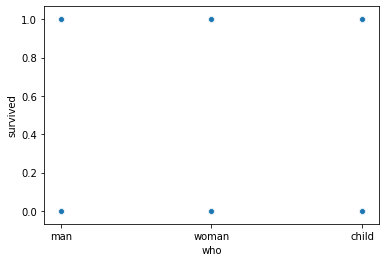

In [93]:
sns.scatterplot(x='who', y='survived',data=titanic)

(array([449.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

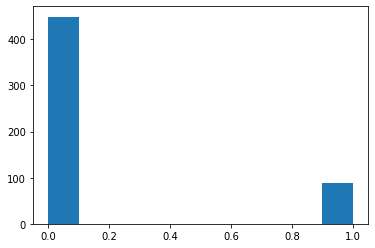

In [94]:
plt.hist(titanic[titanic['who']=='man']['survived']) #lelaki lbh bnyk yg mati

(array([ 66.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 205.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

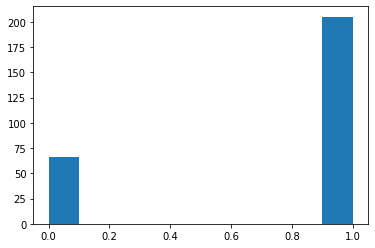

In [95]:
plt.hist(titanic[titanic['who']=='woman']['survived']) #wanita lbh bnyk yg selamat

In [96]:
#korelasi antara 'class' dengan 'fare'
correlation_ratio(titanic['class'], titanic['fare'])

0.5942173195035277

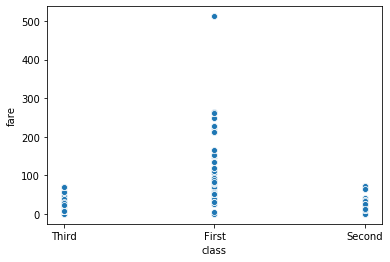

In [97]:
sns.scatterplot(x='class', y='fare', data=titanic)

In [98]:
corr_cat = {}
num_cols = titanic['survived pclass age sibsp parch fare'.split()].columns.tolist()

In [99]:
num_cols

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [100]:
for i in num_cols:
    corr_cat[i] = correlation_ratio(titanic['who'], titanic[i])
corr_cat

{'survived': 0.5644967866491237,
 'pclass': 0.19699064115490794,
 'age': nan,
 'sibsp': 0.373806881008298,
 'parch': 0.4199716214182799,
 'fare': 0.19653582850715912}

## Scaling / Skala

1. scaling dilakukan/digunakan jika ada gap yg terlalu tinggi antar nilai
2. distribusinya akan sama

In [101]:
data ={
    'x' : [1,2,3,4,5,3,2,4,6,7],
    'y' : [1000,2000,3000,5000,3300,6500,7000,5700,6400,3000]
}
data

{'x': [1, 2, 3, 4, 5, 3, 2, 4, 6, 7],
 'y': [1000, 2000, 3000, 5000, 3300, 6500, 7000, 5700, 6400, 3000]}

In [102]:
num = pd.DataFrame(data)
num

x     y
0  1  1000
1  2  2000
2  3  3000
3  4  5000
4  5  3300
5  3  6500
6  2  7000
7  4  5700
8  6  6400
9  7  3000

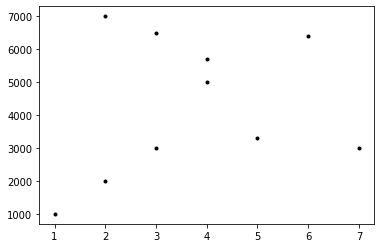

In [103]:
plt.plot(num['x'], num['y'], 'k.')

In [104]:
df

mesin  usia     odo  penumpang        merk  harga  pred_mes  pred_mes_pen  \
0   1000    12  235000          4    Daihatsu     10       6.8           5.9   
1   2000    10  200000          6  Mitsubishi     25      23.8          26.5   
2   3000     9  150000          4       Honda     34      40.8          38.1   
3   4000     5  100000          6      Toyota     55      57.8          58.7   
4   5000     4   90000          6         BMW     80      74.8          74.8   

    pred_pen  pred_mes_us  
0  22.000000     7.221053  
1  53.333333    24.010526  
2  22.000000    38.694737  
3  53.333333    59.694737  
4  53.333333    74.378947

In [105]:
mobil = df[['mesin', 'usia']]
mobil

mesin  usia
0   1000    12
1   2000    10
2   3000     9
3   4000     5
4   5000     4

In [106]:
from sklearn.preprocessing import StandardScaler

scale punya method = fit, 

1. fit = melatih si scaler aja
2. transform = mengubah value
3. fit_transform = melatih sekaligus merubah

In [107]:
scaler = StandardScaler()
scaler.fit(mobil[['mesin']])
mobil['z mesin'] = scaler.transform(mobil[['mesin']])
mobil

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mesin  usia   z mesin
0   1000    12 -1.414214
1   2000    10 -0.707107
2   3000     9  0.000000
3   4000     5  0.707107
4   5000     4  1.414214

In [108]:
scalerb = StandardScaler()
mobil['z_fit_tran_mesin'] = scalerb.fit_transform(mobil[['mesin']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
mobil

mesin  usia   z mesin  z_fit_tran_mesin
0   1000    12 -1.414214         -1.414214
1   2000    10 -0.707107         -0.707107
2   3000     9  0.000000          0.000000
3   4000     5  0.707107          0.707107
4   5000     4  1.414214          1.414214

In [110]:
mobil['z_fit_transform2']=scalerb.transform(mobil[['mesin']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
scalerb.fit(mobil[['z mesin']])
mobil['z_fit_transform3'] = scalerb.transform(mobil[['mesin']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
mobil

mesin  usia   z mesin  z_fit_tran_mesin  z_fit_transform2  z_fit_transform3
0   1000    12 -1.414214         -1.414214         -1.414214            1000.0
1   2000    10 -0.707107         -0.707107         -0.707107            2000.0
2   3000     9  0.000000          0.000000          0.000000            3000.0
3   4000     5  0.707107          0.707107          0.707107            4000.0
4   5000     4  1.414214          1.414214          1.414214            5000.0

fit = melatih si scaler aja. transform = mengubah value. fit_transform = melatih sekaligus merubah.

In [113]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax.fit(mobil[['mesin']])
mobil['minmax'] = minmax.transform(mobil[['mesin']])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [114]:
mobil

mesin  usia   z mesin  z_fit_tran_mesin  z_fit_transform2  \
0   1000    12 -1.414214         -1.414214         -1.414214   
1   2000    10 -0.707107         -0.707107         -0.707107   
2   3000     9  0.000000          0.000000          0.000000   
3   4000     5  0.707107          0.707107          0.707107   
4   5000     4  1.414214          1.414214          1.414214   

   z_fit_transform3  minmax  
0            1000.0    0.00  
1            2000.0    0.25  
2            3000.0    0.50  
3            4000.0    0.75  
4            5000.0    1.00

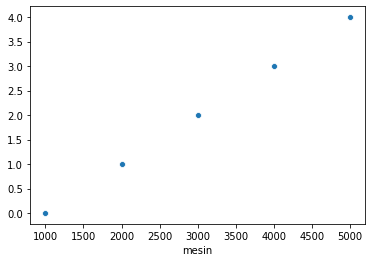

In [115]:
sns.scatterplot(x=mobil['mesin'], y=mobil.index)

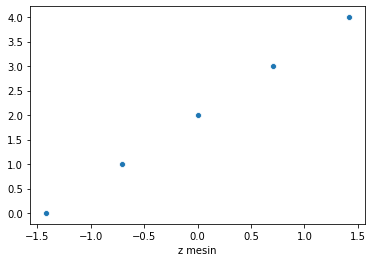

In [116]:
sns.scatterplot(x=mobil['z mesin'], y=mobil.index)

In [117]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [118]:
titanic = titanic.drop(titanic[titanic['age'].isna()==True].index, axis=0)

In [119]:
scalert = StandardScaler()
scalert.fit(titanic[['age']])
titanic['age_z'] = scalert.transform(titanic[['age']])

In [120]:
lr = LinearRegression()
lr.fit(titanic[['age_z']], titanic['fare'])
titanic['fare_prediction'] = lr.predict(titanic[['age_z']])
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone     age_z  \
0      man        True  NaN  Southampton    no  False -0.530377   
1    woman       False    C    Cherbourg   yes  False  0.571831   
2    woman       False  NaN  Southampton   yes   True -0.254825   
3    woman       False    C  Southampton   yes  False  0.365167   
4      man        True  NaN  Southampton    no   True  0.365167   
..     ...         ...  ...          ...   ...    ...       ...   
885  woman       False  NaN   Queenstown    no  False  0.640719   
886    man        True  NaN  Southampton    no   True -0.185937   
887  woman       False    B  Southampton   yes   True -0.737041   
889    man        True    C    Cherbourg   yes   True -0.254825   
890    man        True  NaN   Queenstown    no   True  0.158503   

     fare_prediction  
0          32.000102  
1          37.599521  
2          33.399957  
3          36.549630  
4          36.549630  
..               ...  
885        37.949485  
886        33.749921  
887        30.950211  
889        33.399957  
890        35.499739  

[714 rows x 17 columns]

In [121]:
titanic['age_z'].describe()

count    7.140000e+02
mean     2.174187e-16
std      1.000701e+00
min     -2.016979e+00
25%     -6.595416e-01
50%     -1.170488e-01
75%      5.718310e-01
max      3.465126e+00
Name: age_z, dtype: float64

In [122]:
input_age = 22
scaled_age = scalert.transform([[input_age]])
hasil_predict = lr.predict(scaled_age)
hasil_predict

array([32.00010245])

In [123]:
one = np.random.randint(10,50,1000)
two = np.random.randint(10,30,1000)
three = np.random.randint(1000,3000,1000)
origin = pd.DataFrame({'a': one, 'b': two, 'c':three})
origin

a   b     c
0    12  26  1262
1    45  25  2305
2    12  15  1014
3    26  23  2463
4    29  19  2882
..   ..  ..   ...
995  20  24  1670
996  48  24  2735
997  37  20  1362
998  19  17  2711
999  40  25  2276

[1000 rows x 3 columns]

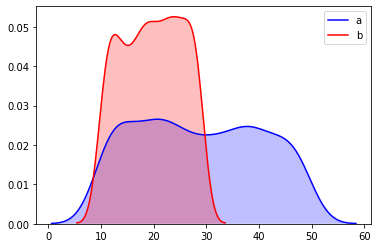

In [124]:
sns.kdeplot(origin.a,shade=True, color='blue')
sns.kdeplot(origin.b, shade=True, color='red')
plt.show()

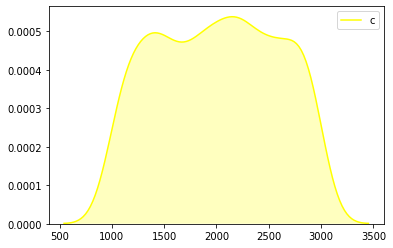

In [125]:
sns.kdeplot(origin.c, shade=True, color='yellow')
plt.show()

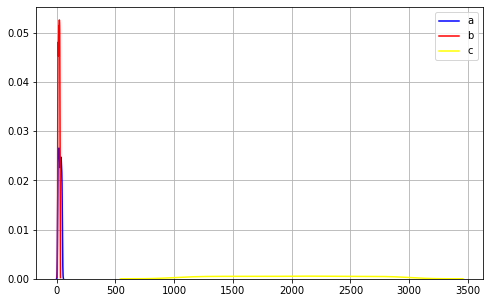

In [126]:
plt.figure(figsize=(8,5))
sns.kdeplot(origin.a, color='blue')
sns.kdeplot(origin.b, color='red')
sns.kdeplot(origin.c, color='yellow')
plt.grid()
plt.show()

## Standard Scaler
$\displaystyle Z = \frac{x_{i}-\bar{x}}{s}$

In [127]:
stdscaler = StandardScaler()
stdscaler.fit(origin['a b c'.split()])
stdscaled = stdscaler.transform(origin['a b c'.split()])
stdscalerdf = pd.DataFrame(stdscaled, columns=['a', 'b', 'c'])
stdscalerdf

a         b         c
0   -1.418683  1.092073 -1.296412
1    1.386719  0.917704  0.518475
2   -1.418683 -0.825986 -1.727948
3   -0.228513  0.568966  0.793405
4    0.026524 -0.128510  1.522492
..        ...       ...       ...
995 -0.738586  0.743335 -0.586466
996  1.641755  0.743335  1.266703
997  0.706621  0.045859 -1.122406
998 -0.823598 -0.477248  1.224941
999  0.961658  0.917704  0.468013

[1000 rows x 3 columns]

In [128]:
dfscaled_desc = stdscalerdf.describe()
dfscaled_desc

a             b             c
count  1.000000e+03  1.000000e+03  1.000000e+03
mean   9.470202e-17  3.200773e-16 -8.104628e-17
std    1.000500e+00  1.000500e+00  1.000500e+00
min   -1.588708e+00 -1.697831e+00 -1.750569e+00
25%   -8.448510e-01 -8.259858e-01 -8.918474e-01
50%   -5.848838e-02  4.585904e-02  2.516655e-02
75%    8.766456e-01  9.177038e-01  8.560474e-01
max    1.726767e+00  1.615180e+00  1.717379e+00

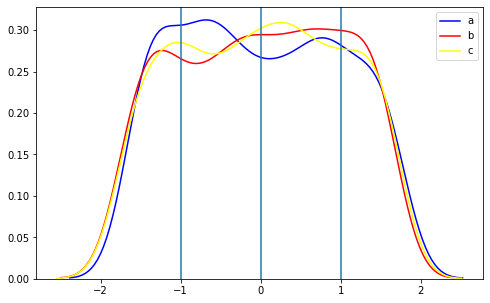

In [129]:
plt.figure(figsize=(8,5))
sns.kdeplot(stdscalerdf.a, color='blue')
sns.kdeplot(stdscalerdf.b, color='red')
sns.kdeplot(stdscalerdf.c, color='yellow')
plt.axvline(dfscaled_desc.iloc[1,0], label='mean')
plt.axvline(dfscaled_desc.iloc[2,0], label='std')
plt.axvline(-dfscaled_desc.iloc[2,0], label='std')
plt.show()

## MinMaxScaler
$\displaystyle MinMax = \frac{x_{i} - min(x)}{max(x) - min(x)}$

In [130]:
minmax = MinMaxScaler()
mmscaled = minmax.fit_transform(origin['a b c'.split()])
mmdf = pd.DataFrame(mmscaled, columns='a b c'.split())
mmdf

a         b         c
0    0.051282  0.842105  0.130958
1    0.897436  0.789474  0.654290
2    0.051282  0.263158  0.006523
3    0.410256  0.684211  0.733567
4    0.487179  0.473684  0.943803
..        ...       ...       ...
995  0.256410  0.736842  0.335675
996  0.974359  0.736842  0.870045
997  0.692308  0.526316  0.181134
998  0.230769  0.368421  0.858003
999  0.769231  0.789474  0.639739

[1000 rows x 3 columns]

In [131]:
mmdf.describe()

a            b            c
count  1000.000000  1000.000000  1000.000000
mean      0.479179     0.512474     0.504785
std       0.301767     0.301991     0.288499
min       0.000000     0.000000     0.000000
25%       0.224359     0.263158     0.247617
50%       0.461538     0.526316     0.512042
75%       0.743590     0.789474     0.751631
max       1.000000     1.000000     1.000000

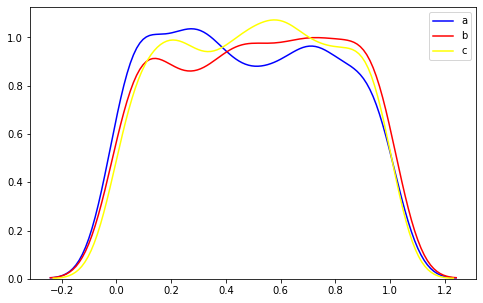

In [132]:
plt.figure(figsize=(8,5))
sns.kdeplot(mmdf.a, color='blue')
sns.kdeplot(mmdf.b, color='red')
sns.kdeplot(mmdf.c, color='yellow')
# plt.axvline(dfscaled_desc.iloc[1,0], label='mean')
# plt.axvline(dfscaled_desc.iloc[2,0], label='std')
# plt.axvline(-dfscaled_desc.iloc[2,0], label='std')
plt.show()

## RobustScaler
$\displaystyle Robust = \frac{x_{i} - median(x)}{Q3(x) - Q1(x)}$

In [133]:
from sklearn.preprocessing import RobustScaler

In [134]:
robust = RobustScaler()
robust.fit(origin[['a', 'b', 'c']])
robuscaled = robust.transform(origin[['a', 'b', 'c']])
rodf = pd.DataFrame(robuscaled, columns='a b c'.split())
rodf

a    b         c
0   -0.790123  0.6 -0.756098
1    0.839506  0.5  0.282230
2   -0.790123 -0.5 -1.002987
3   -0.098765  0.3  0.439522
4    0.049383 -0.1  0.856645
..        ...  ...       ...
995 -0.395062  0.4 -0.349925
996  0.987654  0.4  0.710304
997  0.444444  0.0 -0.656546
998 -0.444444 -0.3  0.686411
999  0.592593  0.5  0.253360

[1000 rows x 3 columns]

In [135]:
rodf['a']

0     -0.790123
1      0.839506
2     -0.790123
3     -0.098765
4      0.049383
         ...   
995   -0.395062
996    0.987654
997    0.444444
998   -0.444444
999    0.592593
Name: a, Length: 1000, dtype: float64

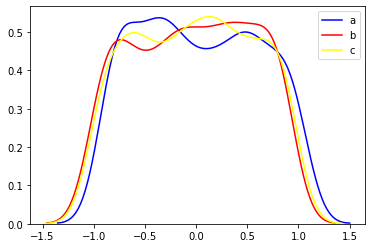

In [136]:
sns.kdeplot(rodf['a'], color='blue')
sns.kdeplot(rodf['b'], color='red')
sns.kdeplot(rodf['c'], color='yellow')

## Normalizer

In [137]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(origin['a b c'.split()])
nomscaled = normalizer.transform(origin['a b c'.split()])
nomdf = pd.DataFrame(nomscaled, columns='a b c'.split())
nomdf

a         b         c
0    0.009506  0.020597  0.999743
1    0.019518  0.010843  0.999751
2    0.011832  0.014790  0.999821
3    0.010555  0.009337  0.999901
4    0.010062  0.006592  0.999928
..        ...       ...       ...
995  0.011974  0.014369  0.999825
996  0.017547  0.008773  0.999808
997  0.027153  0.014677  0.999524
998  0.007008  0.006270  0.999956
999  0.017571  0.010982  0.999785

[1000 rows x 3 columns]

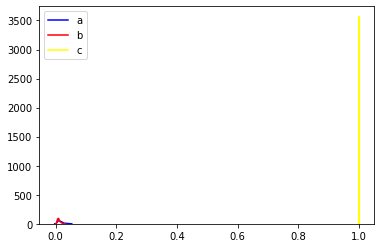

In [138]:
sns.kdeplot(nomdf['a'], color='blue')
sns.kdeplot(nomdf['b'], color='red')
sns.kdeplot(nomdf['c'], color='yellow')

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a0m2

## MaxAbsScaler

In [139]:
from sklearn.preprocessing import MaxAbsScaler

In [140]:
maxabs = MaxAbsScaler()
maxabs.fit(origin['a b c'.split()])
mascaled = maxabs.transform(origin['a b c'.split()])
madf = pd.DataFrame(mascaled, columns=['a', 'b', 'c'])
madf

a         b         c
0    0.244898  0.896552  0.421510
1    0.918367  0.862069  0.769873
2    0.244898  0.517241  0.338677
3    0.530612  0.793103  0.822645
4    0.591837  0.655172  0.962592
..        ...       ...       ...
995  0.408163  0.827586  0.557782
996  0.979592  0.827586  0.913494
997  0.755102  0.689655  0.454910
998  0.387755  0.586207  0.905478
999  0.816327  0.862069  0.760187

[1000 rows x 3 columns]

In [141]:
madf.describe()

a            b            c
count  1000.000000  1000.000000  1000.000000
mean      0.585469     0.680586     0.670353
std       0.240182     0.197856     0.192044
min       0.204082     0.344828     0.334335
25%       0.382653     0.517241     0.499165
50%       0.571429     0.689655     0.675184
75%       0.795918     0.862069     0.834669
max       1.000000     1.000000     1.000000

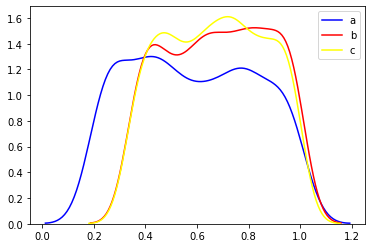

In [142]:
sns.kdeplot(madf['a'], color='blue')
sns.kdeplot(madf['b'], color='red')
sns.kdeplot(madf['c'], color='yellow')

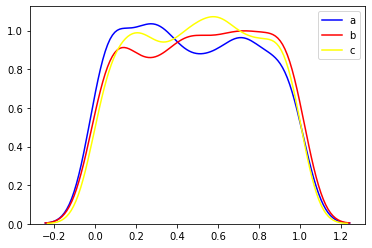

In [143]:
sns.kdeplot(mmdf['a'], color='blue')
sns.kdeplot(mmdf['b'], color='red')
sns.kdeplot(mmdf['c'], color='yellow')

## Label Encoder vs One-Hot Enconding (Alternatif Dummies)

In [144]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [145]:
tcopy = titanic.copy()

In [146]:
tcopy

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone     age_z  \
0      man        True  NaN  Southampton    no  False -0.530377   
1    woman       False    C    Cherbourg   yes  False  0.571831   
2    woman       False  NaN  Southampton   yes   True -0.254825   
3    woman       False    C  Southampton   yes  False  0.365167   
4      man        True  NaN  Southampton    no   True  0.365167   
..     ...         ...  ...          ...   ...    ...       ...   
885  woman       False  NaN   Queenstown    no  False  0.640719   
886    man        True  NaN  Southampton    no   True -0.185937   
887  woman       False    B  Southampton   yes   True -0.737041   
889    man        True    C    Cherbourg   yes   True -0.254825   
890    man        True  NaN   Queenstown    no   True  0.158503   

     fare_prediction  
0          32.000102  
1          37.599521  
2          33.399957  
3          36.549630  
4          36.549630  
..               ...  
885        37.949485  
886        33.749921  
887        30.950211  
889        33.399957  
890        35.499739  

[714 rows x 17 columns]

In [147]:
tcopy.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [148]:
tcopy.drop(tcopy[tcopy['embark_town'].isna()==True].index, axis=0, inplace=True)
tcopy

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone     age_z  \
0      man        True  NaN  Southampton    no  False -0.530377   
1    woman       False    C    Cherbourg   yes  False  0.571831   
2    woman       False  NaN  Southampton   yes   True -0.254825   
3    woman       False    C  Southampton   yes  False  0.365167   
4      man        True  NaN  Southampton    no   True  0.365167   
..     ...         ...  ...          ...   ...    ...       ...   
885  woman       False  NaN   Queenstown    no  False  0.640719   
886    man        True  NaN  Southampton    no   True -0.185937   
887  woman       False    B  Southampton   yes   True -0.737041   
889    man        True    C    Cherbourg   yes   True -0.254825   
890    man        True  NaN   Queenstown    no   True  0.158503   

     fare_prediction  
0          32.000102  
1          37.599521  
2          33.399957  
3          36.549630  
4          36.549630  
..               ...  
885        37.949485  
886        33.749921  
887        30.950211  
889        33.399957  
890        35.499739  

[712 rows x 17 columns]

In [149]:
tcopy.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [150]:
label = LabelEncoder()
tcopy['embark_town_label'] = label.fit_transform(tcopy['embark_town'])
tcopy[['embark_town', 'embark_town_label']]

embark_town  embark_town_label
0    Southampton                  2
1      Cherbourg                  0
2    Southampton                  2
3    Southampton                  2
4    Southampton                  2
..           ...                ...
885   Queenstown                  1
886  Southampton                  2
887  Southampton                  2
889    Cherbourg                  0
890   Queenstown                  1

[712 rows x 2 columns]

In [151]:
label.classes_

array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)

0 > 1 > 2 Cherbourg > Queenstown > Southampton

In [152]:
data = {'sekolah':['sd', 'smp', 'sma', 'kuliah'], 'gaji':[1000000,4000000,2000000,5000000]}

In [153]:
ct = ColumnTransformer([('one_hot', OneHotEncoder(categories='auto'), [12])], remainder='drop')

drop_ct = ct.fit_transform(tcopy)
drop_ct

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [154]:
len(drop_ct)

712

In [155]:
#One-Hot Encoding
oh_embark = pd.DataFrame(drop_ct, columns=['embark_Cherbourg', 'embark_Queenstown', 'embark_Southampon'])
oh_embark

embark_Cherbourg  embark_Queenstown  embark_Southampon
0                 0.0                0.0                1.0
1                 1.0                0.0                0.0
2                 0.0                0.0                1.0
3                 0.0                0.0                1.0
4                 0.0                0.0                1.0
..                ...                ...                ...
707               0.0                1.0                0.0
708               0.0                0.0                1.0
709               0.0                0.0                1.0
710               1.0                0.0                0.0
711               0.0                1.0                0.0

[712 rows x 3 columns]

In [156]:
tcopy

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone     age_z  \
0      man        True  NaN  Southampton    no  False -0.530377   
1    woman       False    C    Cherbourg   yes  False  0.571831   
2    woman       False  NaN  Southampton   yes   True -0.254825   
3    woman       False    C  Southampton   yes  False  0.365167   
4      man        True  NaN  Southampton    no   True  0.365167   
..     ...         ...  ...          ...   ...    ...       ...   
885  woman       False  NaN   Queenstown    no  False  0.640719   
886    man        True  NaN  Southampton    no   True -0.185937   
887  woman       False    B  Southampton   yes   True -0.737041   
889    man        True    C    Cherbourg   yes   True -0.254825   
890    man        True  NaN   Queenstown    no   True  0.158503   

     fare_prediction  embark_town_label  
0          32.000102                  2  
1          37.599521                  0  
2          33.399957                  2  
3          36.549630                  2  
4          36.549630                  2  
..               ...                ...  
885        37.949485                  1  
886        33.749921                  2  
887        30.950211                  2  
889        33.399957                  0  
890        35.499739                  1  

[712 rows x 18 columns]

In [157]:
tcopy_oh = pd.concat([tcopy, oh_embark], axis=1)
tcopy_oh

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0.0     3.0    male  22.0    1.0    0.0   7.2500        S   Third   
1         1.0     1.0  female  38.0    1.0    0.0  71.2833        C   First   
2         1.0     3.0  female  26.0    0.0    0.0   7.9250        S   Third   
3         1.0     1.0  female  35.0    1.0    0.0  53.1000        S   First   
4         0.0     3.0    male  35.0    0.0    0.0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885       0.0     3.0  female  39.0    0.0    5.0  29.1250        Q   Third   
886       0.0     2.0    male  27.0    0.0    0.0  13.0000        S  Second   
887       1.0     1.0  female  19.0    0.0    0.0  30.0000        S   First   
889       1.0     1.0    male  26.0    0.0    0.0  30.0000        C   First   
890       0.0     3.0    male  32.0    0.0    0.0   7.7500        Q   Third   

       who  ... deck  embark_town alive  alone     age_z  fare_prediction  \
0      man  ...  NaN  Southampton    no  False -0.530377        32.000102   
1    woman  ...    C    Cherbourg   yes  False  0.571831        37.599521   
2    woman  ...  NaN  Southampton   yes   True -0.254825        33.399957   
3    woman  ...    C  Southampton   yes  False  0.365167        36.549630   
4      man  ...  NaN  Southampton    no   True  0.365167        36.549630   
..     ...  ...  ...          ...   ...    ...       ...              ...   
885  woman  ...  NaN   Queenstown    no  False  0.640719        37.949485   
886    man  ...  NaN  Southampton    no   True -0.185937        33.749921   
887  woman  ...    B  Southampton   yes   True -0.737041        30.950211   
889    man  ...    C    Cherbourg   yes   True -0.254825        33.399957   
890    man  ...  NaN   Queenstown    no   True  0.158503        35.499739   

     embark_town_label  embark_Cherbourg  embark_Queenstown  embark_Southampon  
0                  2.0               0.0                0.0                1.0  
1                  0.0               1.0                0.0                0.0  
2                  2.0               0.0                0.0                1.0  
3                  2.0               0.0                0.0                1.0  
4                  2.0               0.0                0.0                1.0  
..                 ...               ...                ...                ...  
885                1.0               NaN                NaN                NaN  
886                2.0               NaN                NaN                NaN  
887                2.0               NaN                NaN                NaN  
889                0.0               NaN                NaN                NaN  
890                1.0               NaN                NaN                NaN  

[860 rows x 21 columns]

In [158]:
tcopy_oh.iloc[711]

survived             NaN
pclass               NaN
sex                  NaN
age                  NaN
sibsp                NaN
parch                NaN
fare                 NaN
embarked             NaN
class                NaN
who                  NaN
adult_male           NaN
deck                 NaN
embark_town          NaN
alive                NaN
alone                NaN
age_z                NaN
fare_prediction      NaN
embark_town_label    NaN
embark_Cherbourg       0
embark_Queenstown      1
embark_Southampon      0
Name: 711, dtype: object

In [159]:
tcopy = tcopy.set_index(np.array(list(range(712))))
tcopy

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
707         0       3  female  39.0      0      5  29.1250        Q   Third   
708         0       2    male  27.0      0      0  13.0000        S  Second   
709         1       1  female  19.0      0      0  30.0000        S   First   
710         1       1    male  26.0      0      0  30.0000        C   First   
711         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone     age_z  \
0      man        True  NaN  Southampton    no  False -0.530377   
1    woman       False    C    Cherbourg   yes  False  0.571831   
2    woman       False  NaN  Southampton   yes   True -0.254825   
3    woman       False    C  Southampton   yes  False  0.365167   
4      man        True  NaN  Southampton    no   True  0.365167   
..     ...         ...  ...          ...   ...    ...       ...   
707  woman       False  NaN   Queenstown    no  False  0.640719   
708    man        True  NaN  Southampton    no   True -0.185937   
709  woman       False    B  Southampton   yes   True -0.737041   
710    man        True    C    Cherbourg   yes   True -0.254825   
711    man        True  NaN   Queenstown    no   True  0.158503   

     fare_prediction  embark_town_label  
0          32.000102                  2  
1          37.599521                  0  
2          33.399957                  2  
3          36.549630                  2  
4          36.549630                  2  
..               ...                ...  
707        37.949485                  1  
708        33.749921                  2  
709        30.950211                  2  
710        33.399957                  0  
711        35.499739                  1  

[712 rows x 18 columns]

In [160]:
correct_concat = pd.concat([tcopy, oh_embark], axis=1)
correct_concat

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
707         0       3  female  39.0      0      5  29.1250        Q   Third   
708         0       2    male  27.0      0      0  13.0000        S  Second   
709         1       1  female  19.0      0      0  30.0000        S   First   
710         1       1    male  26.0      0      0  30.0000        C   First   
711         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  ...  deck  embark_town alive  alone     age_z  fare_prediction  \
0      man  ...   NaN  Southampton    no  False -0.530377        32.000102   
1    woman  ...     C    Cherbourg   yes  False  0.571831        37.599521   
2    woman  ...   NaN  Southampton   yes   True -0.254825        33.399957   
3    woman  ...     C  Southampton   yes  False  0.365167        36.549630   
4      man  ...   NaN  Southampton    no   True  0.365167        36.549630   
..     ...  ...   ...          ...   ...    ...       ...              ...   
707  woman  ...   NaN   Queenstown    no  False  0.640719        37.949485   
708    man  ...   NaN  Southampton    no   True -0.185937        33.749921   
709  woman  ...     B  Southampton   yes   True -0.737041        30.950211   
710    man  ...     C    Cherbourg   yes   True -0.254825        33.399957   
711    man  ...   NaN   Queenstown    no   True  0.158503        35.499739   

     embark_town_label  embark_Cherbourg  embark_Queenstown  embark_Southampon  
0                    2               0.0                0.0                1.0  
1                    0               1.0                0.0                0.0  
2                    2               0.0                0.0                1.0  
3                    2               0.0                0.0                1.0  
4                    2               0.0                0.0                1.0  
..                 ...               ...                ...                ...  
707                  1               0.0                1.0                0.0  
708                  2               0.0                0.0                1.0  
709                  2               0.0                0.0                1.0  
710                  0               1.0                0.0                0.0  
711                  1               0.0                1.0                0.0  

[712 rows x 21 columns]

## Ridge, Lasso dan Elastic-Net

Overfitting
- Bisa kurangin kompleksitas features dengan cara menghapus beberapa kolom
- ngurangin presentase dari si X_train nya

Underfitting
- Menambah features, feature engineering
- nambahin presentase dari si X_train nya 

In [161]:
data = {
    'x':np.arange(10),
    'y':np.arange(10) + np.random.randn(10)
}
df = pd.DataFrame(data)
df

x         y
0  0 -0.424469
1  1  0.849934
2  2  1.476260
3  3  3.765456
4  4  4.663894
5  5  2.387464
6  6  6.027453
7  7  6.211410
8  8  6.613133
9  9  8.484067

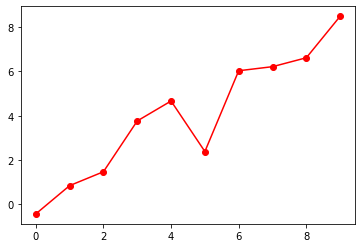

In [162]:
plt.plot(df['x'], df['y'], 'ro-')

## LinearRegression train all data

In [163]:
model = LinearRegression()
model.fit(df[['x']], df['y'])
print('slope (b)=', model.coef_)
print('intercept (a)=', model.intercept_)

slope (b)= [0.9012396]
intercept (a)= -0.050117980376136906


In [164]:
df['y_pred'] = model.predict(df[['x']])
df

x         y    y_pred
0  0 -0.424469 -0.050118
1  1  0.849934  0.851122
2  2  1.476260  1.752361
3  3  3.765456  2.653601
4  4  4.663894  3.554840
5  5  2.387464  4.456080
6  6  6.027453  5.357320
7  7  6.211410  6.258559
8  8  6.613133  7.159799
9  9  8.484067  8.061038

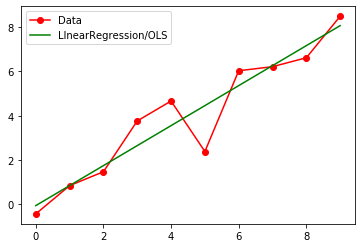

In [165]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y_pred'], 'g-')
plt.legend(['Data', 'LInearRegression/OLS'])

## LinearRegression Train using Train_Test_Split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], train_size=0.8)

In [167]:
X_train

x
6  6
9  9
2  2
8  8
4  4
5  5
1  1
3  3

In [168]:
X_test

x
7  7
0  0

In [169]:
model.fit(X_train, y_train)
df['y_pred_split'] = model.predict(df[['x']])
df

x         y    y_pred  y_pred_split
0  0 -0.424469 -0.050118      0.145676
1  1  0.849934  0.851122      1.016788
2  2  1.476260  1.752361      1.887900
3  3  3.765456  2.653601      2.759012
4  4  4.663894  3.554840      3.630124
5  5  2.387464  4.456080      4.501236
6  6  6.027453  5.357320      5.372348
7  7  6.211410  6.258559      6.243460
8  8  6.613133  7.159799      7.114572
9  9  8.484067  8.061038      7.985684

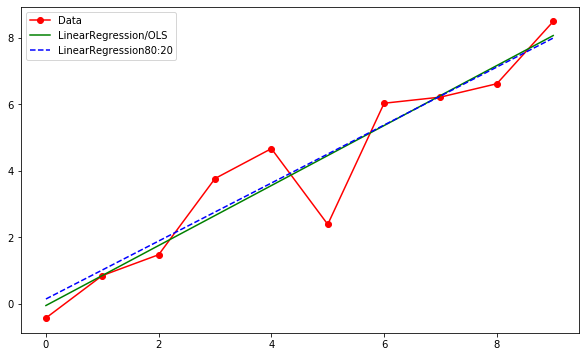

In [170]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df['y_pred'],'g-')
plt.plot(df['x'],df['y_pred_split'], 'b--')
plt.legend(['Data', 'LinearRegression/OLS', 'LinearRegression80:20'])

## Train Only With 2 Data

In [171]:
model.fit(df[['x']].iloc[0:2], df['y'].iloc[0:2])
df['y_pred_2data'] = model.predict(df[['x']])
df

x         y    y_pred  y_pred_split  y_pred_2data
0  0 -0.424469 -0.050118      0.145676     -0.424469
1  1  0.849934  0.851122      1.016788      0.849934
2  2  1.476260  1.752361      1.887900      2.124337
3  3  3.765456  2.653601      2.759012      3.398740
4  4  4.663894  3.554840      3.630124      4.673143
5  5  2.387464  4.456080      4.501236      5.947546
6  6  6.027453  5.357320      5.372348      7.221949
7  7  6.211410  6.258559      6.243460      8.496352
8  8  6.613133  7.159799      7.114572      9.770755
9  9  8.484067  8.061038      7.985684     11.045158

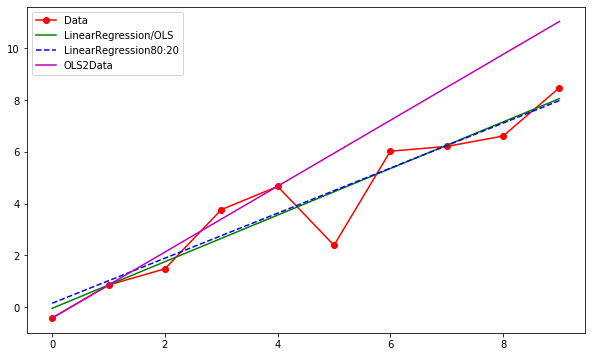

In [172]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df['y_pred'],'g-')
plt.plot(df['x'],df['y_pred_split'], 'b--')
plt.plot(df['x'],df['y_pred_2data'], 'm-')
plt.legend(['Data', 'LinearRegression/OLS', 'LinearRegression80:20', 'OLS2Data'])

## Ridge Regression

Sum Squared Error (SSE).Ordinary Least Squared (OLS) = $\sum (y_i - \hat{y_i})^2$

L(Loss Function)2 Regularization dan L(Loss Function)1 Regularization

$ Ridge = SSE.OLS + \lambda \times \sum b^2 $

$ Ridge = \sum (y - \hat{y})^2 +\lambda \times \sum b^2 $

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [173]:
from sklearn.linear_model import Ridge

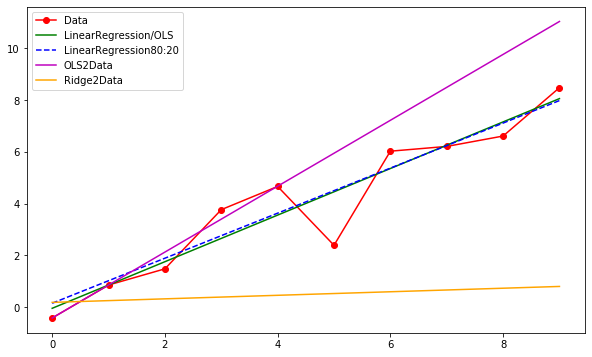

In [174]:
modelR = Ridge(alpha=8.8)
modelR.fit(df[['x']].iloc[0:2], df['y'].iloc[0:2])
df['y_pred_2data_ridge'] = modelR.predict(df[['x']])

plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df['y_pred'],'g-')
plt.plot(df['x'],df['y_pred_split'], 'b--')
plt.plot(df['x'],df['y_pred_2data'], 'm-')
plt.plot(df['x'], df['y_pred_2data_ridge'], 'orange')
plt.legend(['Data', 'LinearRegression/OLS', 'LinearRegression80:20', 'OLS2Data', 'Ridge2Data'])
plt.show()

## Lasso

Sum Squared Error (SSE).Ordinary Least Squared (OLS) = $\sum (y - \hat{y})^2$

$ LASSO = \sum (y - \hat{y})^2 + \lambda . \sum|b| $ 

$LASSO = SSE.OLS + \lambda . \sum|b| $

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [175]:
from sklearn.linear_model import Lasso

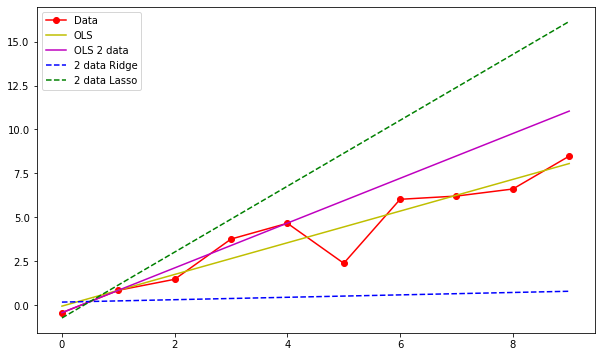

In [176]:
modelLas = Lasso(alpha=-0.15)
modelLas.fit(df[['x']].iloc[0:2], df['y'].iloc[0:2])
df['y_pred_2data_lasso'] = modelLas.predict(df[['x']])

plt.figure(figsize=(10,6))
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y_pred'], 'y-')
plt.plot(df['x'], df['y_pred_2data'], 'm-')
plt.plot(df['x'], df['y_pred_2data_ridge'], 'b--')
plt.plot(df['x'], df['y_pred_2data_lasso'], 'g--')
plt.legend(['Data', 'OLS', 'OLS 2 data', '2 data Ridge', '2 data Lasso'])
plt.show()

In [177]:
df

x         y    y_pred  y_pred_split  y_pred_2data  y_pred_2data_ridge  \
0  0 -0.424469 -0.050118      0.145676     -0.424469            0.178474   
1  1  0.849934  0.851122      1.016788      0.849934            0.246991   
2  2  1.476260  1.752361      1.887900      2.124337            0.315507   
3  3  3.765456  2.653601      2.759012      3.398740            0.384023   
4  4  4.663894  3.554840      3.630124      4.673143            0.452540   
5  5  2.387464  4.456080      4.501236      5.947546            0.521056   
6  6  6.027453  5.357320      5.372348      7.221949            0.589572   
7  7  6.211410  6.258559      6.243460      8.496352            0.658088   
8  8  6.613133  7.159799      7.114572      9.770755            0.726605   
9  9  8.484067  8.061038      7.985684     11.045158            0.795121   

   y_pred_2data_lasso  
0           -0.724469  
1            1.149934  
2            3.024337  
3            4.898740  
4            6.773143  
5            8.647546  
6           10.521949  
7           12.396352  
8           14.270755  
9           16.145158

In [178]:
print('RMSE OLS all data:', np.sqrt(mse(df['y'], df['y_pred'])))
print('RMSE OLS 80:20 data:', np.sqrt(mse(df['y'], df['y_pred_split'])))
print('RMSE OLS 2 data:', np.sqrt(mse(df['y'], df['y_pred_2data'])))
print('RMSE ridge 2 data:', np.sqrt(mse(df['y'], df['y_pred_2data_ridge'])))
print('RMSE lasso 2 data:', np.sqrt(mse(df['y'], df['y_pred_2data_lasso'])))

RMSE OLS all data: 0.8883052269987091
RMSE OLS 80:20 data: 0.8945394629204078
RMSE OLS 2 data: 1.9080434628165812
RMSE ridge 2 data: 4.346361015036897
RMSE lasso 2 data: 4.725292909746248


## Elastic-Net
Sum Squared Error OLS $ = \sum (y - \hat{y})^2 $

SSE EN = $ SSE .OLS \displaystyle + \lambda_{ridge} \times \sum b^2 + \lambda_{lasso} \times \sum |b| $

In [179]:
from sklearn.linear_model import ElasticNet

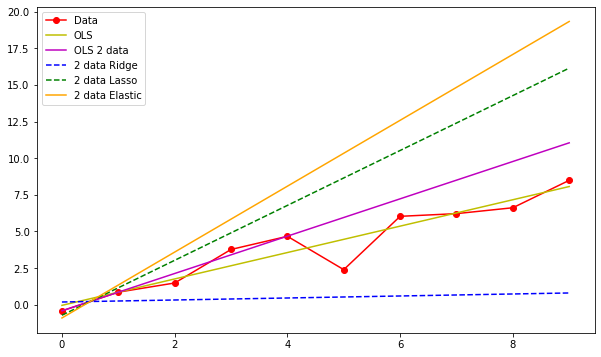

In [180]:
modelE = ElasticNet(alpha=-0.13, l1_ratio=0.3) #alpha bisa dirubah2, cari yg plg optimum
modelE.fit(df[['x']].iloc[0:2], df['y'].iloc[0:2])

df['y_pred_2data_elas'] = modelE.predict(df[['x']])

plt.figure(figsize=(10,6))
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y_pred'], 'y-')
plt.plot(df['x'], df['y_pred_2data'], 'm-')
plt.plot(df['x'], df['y_pred_2data_ridge'], 'b--')
plt.plot(df['x'], df['y_pred_2data_lasso'], 'g--')
plt.plot(df['x'], df['y_pred_2data_elas'], 'orange')
plt.legend(['Data', 'OLS', 'OLS 2 data', '2 data Ridge', '2 data Lasso', '2 data Elastic'])
plt.show()

## Polynomial Regression

In [181]:
#digunakan jika bentuk datanya berupa kurva

x = np.arange(0, 360, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))
df_poly = pd.DataFrame({'x':x, 'y':y})
df_poly

x         y
0     0  0.903174
1    10  0.824108
2    20  0.943182
3    30  0.827782
4    40  0.813796
5    50  1.043160
6    60  0.457512
7    70  0.160731
8    80  0.119987
9    90 -0.003099
10  100 -0.248231
11  110 -0.028329
12  120 -0.430894
13  130 -0.583159
14  140 -0.619357
15  150 -1.094179
16  160 -1.079634
17  170 -1.022080
18  180 -0.934600
19  190 -0.925483
20  200 -0.869693
21  210 -0.919753
22  220 -0.759447
23  230 -0.720168
24  240 -0.395100
25  250 -0.502959
26  260 -0.436992
27  270  0.069804
28  280  0.263613
29  290  0.119594
30  300  0.768310
31  310  0.679384
32  320  0.772053
33  330  0.909173
34  340  0.826592
35  350  0.682651

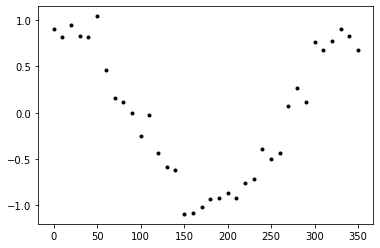

In [182]:
#datanya berbentuk kurva

plt.plot(df_poly['x'], df_poly['y'], 'k.')

In [183]:
lrp = LinearRegression()
rip = Ridge(alpha=1)
lap = Lasso(alpha=2)
elap = ElasticNet(alpha=3, l1_ratio=0.3)

lrp.fit(df_poly[['x']], df_poly['y'])
rip.fit(df_poly[['x']], df_poly['y'])
lap.fit(df_poly[['x']], df_poly['y'])
elap.fit(df_poly[['x']], df_poly['y'])

ElasticNet(alpha=3, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [184]:
df_poly['linear'] = lrp.predict(df_poly[['x']])
df_poly['ridge'] = rip.predict(df_poly[['x']])
df_poly['lasso'] = lap.predict(df_poly[['x']])
df_poly['elastic'] = elap.predict(df_poly[['x']])

In [185]:
df_poly

x         y    linear     ridge     lasso   elastic
0     0  0.903174  0.098523  0.098523  0.066091  0.083910
1    10  0.824108  0.092276  0.092276  0.061697  0.078498
2    20  0.943182  0.086030  0.086030  0.057304  0.073087
3    30  0.827782  0.079783  0.079783  0.052911  0.067675
4    40  0.813796  0.073537  0.073536  0.048517  0.062264
5    50  1.043160  0.067290  0.067290  0.044124  0.056852
6    60  0.457512  0.061043  0.061043  0.039730  0.051440
7    70  0.160731  0.054797  0.054796  0.035337  0.046029
8    80  0.119987  0.048550  0.048550  0.030944  0.040617
9    90 -0.003099  0.042303  0.042303  0.026550  0.035206
10  100 -0.248231  0.036057  0.036057  0.022157  0.029794
11  110 -0.028329  0.029810  0.029810  0.017764  0.024382
12  120 -0.430894  0.023563  0.023563  0.013370  0.018971
13  130 -0.583159  0.017317  0.017317  0.008977  0.013559
14  140 -0.619357  0.011070  0.011070  0.004584  0.008148
15  150 -1.094179  0.004824  0.004823  0.000190  0.002736
16  160 -1.079634 -0.001423 -0.001423 -0.004203 -0.002676
17  170 -1.022080 -0.007670 -0.007670 -0.008596 -0.008087
18  180 -0.934600 -0.013916 -0.013916 -0.012990 -0.013499
19  190 -0.925483 -0.020163 -0.020163 -0.017383 -0.018910
20  200 -0.869693 -0.026410 -0.026410 -0.021776 -0.024322
21  210 -0.919753 -0.032656 -0.032656 -0.026170 -0.029734
22  220 -0.759447 -0.038903 -0.038903 -0.030563 -0.035145
23  230 -0.720168 -0.045150 -0.045149 -0.034957 -0.040557
24  240 -0.395100 -0.051396 -0.051396 -0.039350 -0.045968
25  250 -0.502959 -0.057643 -0.057643 -0.043743 -0.051380
26  260 -0.436992 -0.063889 -0.063889 -0.048137 -0.056792
27  270  0.069804 -0.070136 -0.070136 -0.052530 -0.062203
28  280  0.263613 -0.076383 -0.076383 -0.056923 -0.067615
29  290  0.119594 -0.082629 -0.082629 -0.061317 -0.073027
30  300  0.768310 -0.088876 -0.088876 -0.065710 -0.078438
31  310  0.679384 -0.095123 -0.095122 -0.070103 -0.083850
32  320  0.772053 -0.101369 -0.101369 -0.074497 -0.089261
33  330  0.909173 -0.107616 -0.107616 -0.078890 -0.094673
34  340  0.826592 -0.113863 -0.113862 -0.083283 -0.100085
35  350  0.682651 -0.120109 -0.120109 -0.087677 -0.105496

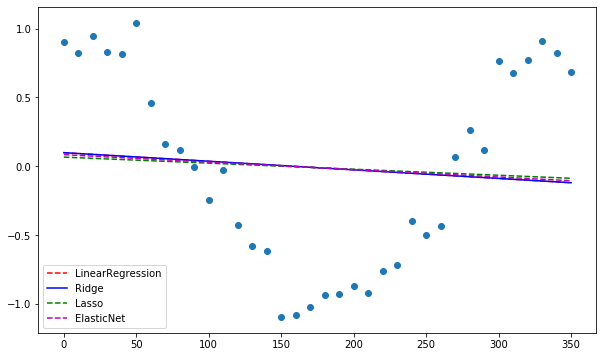

In [186]:
plt.figure(figsize=(10,6))
plt.scatter(df_poly['x'], df_poly['y'])
plt.plot(df_poly['x'], df_poly['linear'], 'r--', label='LinearRegression')
plt.plot(df_poly['x'], df_poly['ridge'], 'b-', label='Ridge')
plt.plot(df_poly['x'], df_poly['lasso'], 'g--', label='Lasso')
plt.plot(df_poly['x'], df_poly['elastic'], 'm--', label='ElasticNet')
plt.legend()
plt.show()

In [187]:
df_poly.head()

x         y    linear     ridge     lasso   elastic
0   0  0.903174  0.098523  0.098523  0.066091  0.083910
1  10  0.824108  0.092276  0.092276  0.061697  0.078498
2  20  0.943182  0.086030  0.086030  0.057304  0.073087
3  30  0.827782  0.079783  0.079783  0.052911  0.067675
4  40  0.813796  0.073537  0.073536  0.048517  0.062264

In [188]:
for i in range(2,5):
    df_poly[f'x{i}'] = df_poly['x']**i

In [189]:
df_poly.head()

x         y    linear     ridge     lasso   elastic    x2     x3       x4
0   0  0.903174  0.098523  0.098523  0.066091  0.083910     0      0        0
1  10  0.824108  0.092276  0.092276  0.061697  0.078498   100   1000    10000
2  20  0.943182  0.086030  0.086030  0.057304  0.073087   400   8000   160000
3  30  0.827782  0.079783  0.079783  0.052911  0.067675   900  27000   810000
4  40  0.813796  0.073537  0.073536  0.048517  0.062264  1600  64000  2560000

In [190]:
polymodel = LinearRegression()
polymodel.fit(df_poly[['x','x2']], df_poly['y'])
df_poly['poly_pred'] = polymodel.predict(df_poly[['x', 'x2']])
df_poly.head()

x         y    linear     ridge     lasso   elastic    x2     x3       x4  \
0   0  0.903174  0.098523  0.098523  0.066091  0.083910     0      0        0   
1  10  0.824108  0.092276  0.092276  0.061697  0.078498   100   1000    10000   
2  20  0.943182  0.086030  0.086030  0.057304  0.073087   400   8000   160000   
3  30  0.827782  0.079783  0.079783  0.052911  0.067675   900  27000   810000   
4  40  0.813796  0.073537  0.073536  0.048517  0.062264  1600  64000  2560000   

   poly_pred  
0   1.440224  
1   1.203972  
2   0.981249  
3   0.772056  
4   0.576393

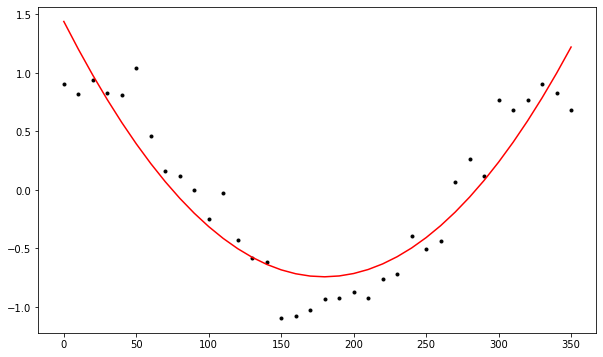

In [191]:
plt.figure(figsize=(10,6))
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.plot(df_poly['x'], df_poly['poly_pred'], 'r-')
plt.show()

In [192]:
x_list = ['x']
for i in range(2,5):
    x_list.append(f'x{i}')
    modelrp = LinearRegression()
    modelrp.fit(df_poly[x_list], df_poly['y'])
    df_poly[f'predict_lr{i}'] = modelrp.predict(df_poly[x_list])
    
df_poly.head()

x         y    linear     ridge     lasso   elastic    x2     x3       x4  \
0   0  0.903174  0.098523  0.098523  0.066091  0.083910     0      0        0   
1  10  0.824108  0.092276  0.092276  0.061697  0.078498   100   1000    10000   
2  20  0.943182  0.086030  0.086030  0.057304  0.073087   400   8000   160000   
3  30  0.827782  0.079783  0.079783  0.052911  0.067675   900  27000   810000   
4  40  0.813796  0.073537  0.073536  0.048517  0.062264  1600  64000  2560000   

   poly_pred  predict_lr2  predict_lr3  predict_lr4  
0   1.440224     1.440224     1.341720     1.315872  
1   1.203972     1.203972     1.139241     1.123879  
2   0.981249     0.981249     0.945324     0.939028  
3   0.772056     0.772056     0.760272     0.761682  
4   0.576393     0.576393     0.584384     0.592189

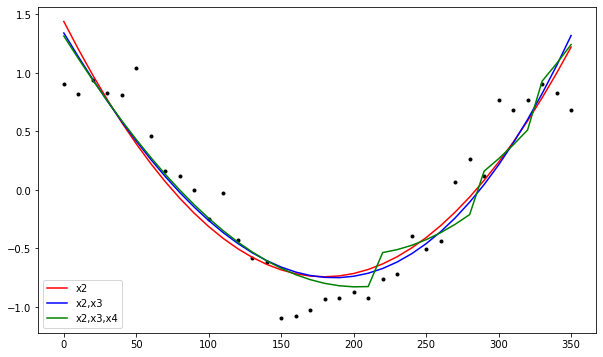

In [193]:
plt.figure(figsize=(10,6))
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.plot(df_poly['x'], df_poly['predict_lr2'], 'r-', label='x2')
plt.plot(df_poly['x'], df_poly['predict_lr3'], 'b-', label='x2,x3')
plt.plot(df_poly['x'], df_poly['predict_lr4'], 'g-', label='x2,x3,x4')
plt.legend()
plt.show()

https://www.youtube.com/watch?v=Qnt2vBRW8Io

In [194]:
from sklearn.preprocessing import PolynomialFeatures

In [195]:
a = [2]
a_poly = PolynomialFeatures(3, include_bias=False)
#include bias maksudnya, apakah mengikutsertakan pangkat 0 atau tidak
a_poly.fit_transform([a])

array([[2., 4., 8.]])

In [196]:
b = [3,6,9]
b_poly = PolynomialFeatures(5, include_bias=False)
bp = b_poly.fit_transform(np.array(b).reshape(-1,1))
bp

array([[3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01, 2.4300e+02],
       [6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03, 7.7760e+03],
       [9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03, 5.9049e+04]])

In [197]:
bdf = pd.DataFrame(bp, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
bdf

x1    x2     x3      x4       x5
0  3.0   9.0   27.0    81.0    243.0
1  6.0  36.0  216.0  1296.0   7776.0
2  9.0  81.0  729.0  6561.0  59049.0

In [198]:
b = [3,6,9]
np.array(b).reshape(-1,1)

array([[3],
       [6],
       [9]])

In [199]:
dfp = pd.DataFrame({'c': np.arange(1,11)})
x = PolynomialFeatures(10, include_bias=False)
cp = x.fit_transform(dfp[['c']])
new_df = pd.DataFrame(cp)
pd.concat([dfp, new_df], axis=1)

c     0      1       2        3         4          5           6  \
0   1   1.0    1.0     1.0      1.0       1.0        1.0         1.0   
1   2   2.0    4.0     8.0     16.0      32.0       64.0       128.0   
2   3   3.0    9.0    27.0     81.0     243.0      729.0      2187.0   
3   4   4.0   16.0    64.0    256.0    1024.0     4096.0     16384.0   
4   5   5.0   25.0   125.0    625.0    3125.0    15625.0     78125.0   
5   6   6.0   36.0   216.0   1296.0    7776.0    46656.0    279936.0   
6   7   7.0   49.0   343.0   2401.0   16807.0   117649.0    823543.0   
7   8   8.0   64.0   512.0   4096.0   32768.0   262144.0   2097152.0   
8   9   9.0   81.0   729.0   6561.0   59049.0   531441.0   4782969.0   
9  10  10.0  100.0  1000.0  10000.0  100000.0  1000000.0  10000000.0   

             7             8             9  
0          1.0  1.000000e+00  1.000000e+00  
1        256.0  5.120000e+02  1.024000e+03  
2       6561.0  1.968300e+04  5.904900e+04  
3      65536.0  2.621440e+05  1.048576e+06  
4     390625.0  1.953125e+06  9.765625e+06  
5    1679616.0  1.007770e+07  6.046618e+07  
6    5764801.0  4.035361e+07  2.824752e+08  
7   16777216.0  1.342177e+08  1.073742e+09  
8   43046721.0  3.874205e+08  3.486784e+09  
9  100000000.0  1.000000e+09  1.000000e+10

## Pipeline

In [200]:
from sklearn.preprocessing import StandardScaler, Binarizer

In [201]:
data = np.arange(1000,11000,1000).reshape(-1,1)
data

array([[ 1000],
       [ 2000],
       [ 3000],
       [ 4000],
       [ 5000],
       [ 6000],
       [ 7000],
       [ 8000],
       [ 9000],
       [10000]])

In [202]:
data = StandardScaler().fit_transform(data)
data

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [203]:
data_bin = Binarizer(threshold=0).fit_transform(data)
data_bin

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [204]:
# using pipeline
# untuk menyederhanakan step-step di atas
from sklearn.pipeline import make_pipeline

In [205]:
data2 = np.arange(1000,11000,1000).reshape(-1,1)
pipe = make_pipeline(StandardScaler(), Binarizer(threshold=0))
data2_bin = pipe.fit_transform(data2)
# pipeline membuat urutan step 

data2_bin

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [206]:
# Contoh data lain menggunakan pipeline
x = np.arange(0,270,10)
y = np.cos(x*np.pi/180) + np.random.normal(0,0.15,len(x))
df = pd.DataFrame({'x':x, 'y':y})
df

x         y
0     0  0.942789
1    10  0.906928
2    20  0.927293
3    30  0.726443
4    40  0.816269
5    50  0.543246
6    60  0.675221
7    70  0.193394
8    80  0.356409
9    90 -0.096114
10  100  0.010143
11  110 -0.366508
12  120 -0.470584
13  130 -0.717411
14  140 -0.916428
15  150 -1.110418
16  160 -0.813750
17  170 -1.198299
18  180 -0.894015
19  190 -0.919353
20  200 -0.867189
21  210 -0.725614
22  220 -0.916142
23  230 -0.548648
24  240 -0.556227
25  250 -0.636297
26  260 -0.309288

In [207]:
# Cara Manual
pol = PolynomialFeatures(2, include_bias=False)
xp = pol.fit_transform(df[['x']])
new_xp = pd.DataFrame(xp, columns=['1', '2'])
new_xp = pd.concat([df.copy(), new_xp], axis=1)
new_xp.head()

x         y     1       2
0   0  0.942789   0.0     0.0
1  10  0.906928  10.0   100.0
2  20  0.927293  20.0   400.0
3  30  0.726443  30.0   900.0
4  40  0.816269  40.0  1600.0

In [208]:
lrpol = LinearRegression()
lrpol.fit(new_xp[['1','2']], new_xp['y'])
new_xp['prediction'] = lrpol.predict(new_xp[['1','2']])
new_xp.head()

x         y     1       2  prediction
0   0  0.942789   0.0     0.0    1.386948
1  10  0.906928  10.0   100.0    1.165050
2  20  0.927293  20.0   400.0    0.954937
3  30  0.726443  30.0   900.0    0.756611
4  40  0.816269  40.0  1600.0    0.570072

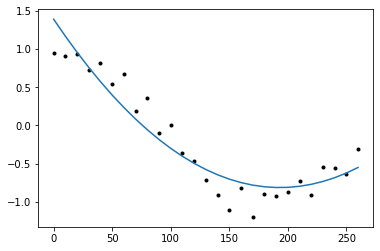

In [209]:
plt.plot(new_xp['x'], new_xp['y'],'k.')
plt.plot(new_xp['x'], new_xp['prediction'])

In [210]:
# Menyederhanakan step di atas menggunakan Pipeline

In [211]:
poly_reg = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())

poly_reg.fit(new_xp[['x']], new_xp['y'])
new_xp['prediction2']= poly_reg.predict(new_xp[['x']])

new_xp.head()

x         y     1       2  prediction  prediction2
0   0  0.942789   0.0     0.0    1.386948     1.386948
1  10  0.906928  10.0   100.0    1.165050     1.165050
2  20  0.927293  20.0   400.0    0.954937     0.954937
3  30  0.726443  30.0   900.0    0.756611     0.756611
4  40  0.816269  40.0  1600.0    0.570072     0.570072

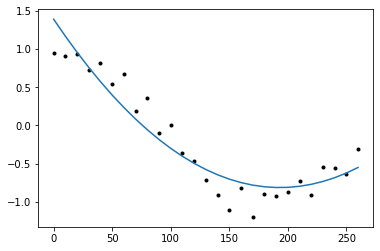

In [212]:
plt.plot(new_xp['x'], new_xp['y'],'k.')
plt.plot(new_xp['x'], new_xp['prediction2'])

## To Sum Up LinearRegression

In [213]:
dfmpg = sns.load_dataset('mpg')
dfmpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

In [214]:
# cleaning data horsepower

def isi_horsepower(cols):
    hp = cols[0]
    my = cols[1]
    ori = cols[2]
    cyl = cols[3]
    
    if pd.isnull(hp):
        return (dfmpg[dfmpg['cylinders']==cyl]['horsepower'].mean() + dfmpg[dfmpg['model_year']==my]['horsepower'].mean()
                + dfmpg[dfmpg['origin']==ori]['horsepower'].mean()) / 3
    else:
        return hp


In [215]:
dfmpg['horsepower'] = dfmpg[['horsepower', 'model_year', 'origin', 'cylinders']].apply(isi_horsepower,axis=1)

In [216]:
dfmpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

In [217]:
# menggunakan Library statsmodel

In [218]:
X = dfmpg.drop(['mpg', 'origin', 'name'], axis=1)
y = dfmpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

import statsmodels.api as sm
from statsmodels.api import OLS

sm_lm = OLS(y_train, sm.add_constant(X_train))
result = sm_lm.fit()
result.summary()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     205.2
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          1.98e-101
Time:                        22:11:52   Log-Likelihood:                -790.08
No. Observations:                 298   AIC:                             1594.
Df Residuals:                     291   BIC:                             1620.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.0724      5.465     -2.392      0.017     -23.828      -2.317
cylinders       -0.3081      0.386     -0.798      0.426      -1.068       0.452
displacement     0.0090      0.009      1.024      0.307      -0.008       0.026
horsepower      -0.0003      0.016     -0.017      0.986      -0.031       0.031
weight          -0.0071      0.001     -9.447      0.000      -0.009      -0.006
acceleration     0.1118      0.113      0.988      0.324      -0.111       0.335
model_year       0.7378      0.061     12.160      0.000       0.618       0.857
==============================================================================
Omnibus:                       30.638   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.335
Skew:                           0.649   Prob(JB):                     5.27e-11
Kurtosis:                       4.458   Cond. No.                     8.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
coef_df = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['Coeffisient'])
coef_df

Coeffisient
cylinders       -0.308059
displacement     0.008987
horsepower      -0.000273
weight          -0.007099
acceleration     0.111815
model_year       0.737756

In [221]:
lr.intercept_

-13.072418216436738

In [222]:
r2_score(y_test, lr.predict(X_test))

0.8045799122341394


b = coeff dari sample $\beta$ = coeff dari populasi

## F-test / Anova
$\displaystyle H_0 : \beta_{1} = \beta_{2} = \beta_{3} = ..... \beta_{n} = 0$

$\displaystyle H_a : \beta_{1} = \beta_{2} = \beta_{3} = ..... \beta_{n} \neq 0$

F-statistic > 0.05, maka $\displaystyle H0$ gagal ditolak

F-statistic < 0.05, maka $\displaystyle H0$ ditolak

atau

Prob F-statistic < 0.05, maka $\displaystyle H0$ ditolak

Prob F-statistic > 0.05, maka $\displaystyle H0$ gagal ditolak

https://www.youtube.com/watch?v=VvlqA-iO2HA

## t-test
$\displaystyle H_0 : \beta = 0$

$\displaystyle H_a : \beta \neq 0$

Prob |t| < 0.05, maka $\displaystyle H0$ ditolak

Prob |t| > 0.05, maka $\displaystyle H0$ gagal ditolak

https://www.youtube.com/watch?v=VvlqA-iO2HA

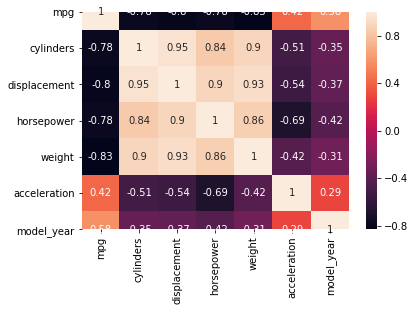

In [223]:
sns.heatmap(dfmpg.corr(), annot=True)